<center><img src='https://www.isel.pt/sites/default/files/SCI/Identidade/logo_ISEL_simplificado_cor.png' width=350>

<h3><center>Instituto Superior de Engenharia de Lisboa</h3>
<h3><center>Departamento Engenharia Eletrónica e Telecomunicações de Computadores</h2>
<h3><center>Licenciatura em Engenharia Informática e Multimédia</h2>
<h3><center>Aprendizagem Automática</h2>

<h1> <center>Classificação de Críticas de Cerveja </h1>

<h4><center>Ano Letivo 2023/2024 <br> Turma 51D</h3>
<h4><center> Docente: <br> Gonçalo Marques </h3>
<h4> <center> Aluno: <br> Duarte Gonçalves nº46484 </h3>
<hr>

# <center> Índice
1. [Introdução](#introducao)
2. [Pressupostos Teóricos](#teoria)\
    2.1 [Aprendizagem Supervisionada](#as)<br>
    2.2 [Aprendizagem Não Supervisionada](#ans)
3. [Inicialização e Verificação dos Dados](#dados)
4. [Desenvolvimento](#desenvolvimento)\
    4.1 [Restruturação de Dados](#desenvolvimento-1)\
        4.1.1 [Desconstrução dos Dicionários](#desenvolvimento-1-1)<br>
        4.1.2 [Análise e Limpeza de Dados](#desenvolvimento-1-2)\
    4.2 [Vocabulário](#desenvolvimento-2)\
        4.2.1 [Limpeza de Texto](#desenvolvimento-2-1)<br>
        4.2.2 [TfidfVectorizer](#desenvolvimento-2-2)<br>
        4.2.3 [Stemmer](#desenvolvimento-2-3)<br>
    4.3 [Classificadores](#desenvolvimento-3)
        4.3.1[Classificação Binária](#desenvolvimento-3-1)
            4.3.1.1[SVM](#desenvolvimento-3-1-1)
            4.3.1.2[Regressão Logística](#desenvolvimento-3-1-2)
        4.3.2[Classificação Multi-Classe](#desenvolvimento-3-2)
            4.3.2.1[SVM](#desenvolvimento-3-2-1)
        4.3.3[Classificação Opcional](#desenvolvimento-3-3)
            4.3.3.1[PCA]

<hr>

# <center> 1. Introdução <a id="introducao"></a>

No âmbito da unidade curricular de Aprendizagem Automática, foi proposto o desenvolvimento de um algoritmo que classifica-se críticas de várias cervejas, de acordo com as diversas categorias de classificação como a sua avaliação geral, cheiro, sabor, textura e estilo, como projeto final da mesma, através do uso dos diferentes classificadores lecionados na unidade curricular.<br>

Resumidamente, este projeto tem como objetivos determinar a qualidade de uma cerveja baseado no que foi escrito sobre a mesma. O que para tal, surgem duas tarefas de classificação a ser implementadas: 
- **Classificação Binária** - Determinar os dados positivos e negativos das críticas;
- **Classificação Multi-Classe** - Determinar a pontuação das críticas com base nas várias caracteristicas (Overall, smell, taste);

Para cada um dos diferentes tipos de classificação, será necessário determinar o melhor vocabulário a utilizar e ainda ter em consideração a dimensão da própria critica e da utilidade de certas da mesma.<br>

Este documento, apresenta todos os passos procedidos para o desenvolvimento desse mesmo algoritmo tendo, analises dos dados e também justificações de usos dos classificadores usados assim como dos procedimentos feitos que permitem chegar a uma conclusão aceitável.<br>
<hr>

# <center> 2. Pressupostos Teóricos <a id="teoria"></a>
## 2.1 Aprendizagem Supervisionada <a id="as"></a>
Na Aprendizagem supervisionada, é feito um ensino de dados rotulados ao algoritmo, onde este aprende a mapear as entradas para as saídas desejadas. Isto é, é fornecido ao algoritmo um conjunto de informações já dividas por classe e que posteriormente é fornecido um novo conjunto de informação para serem analisado e classificados da mesma forma, comparando as com as já conhecidas e associando-as à classe onde melhor se enquandrará. Podendo este ser divididos nos seguintes :<br>
- **Classificação:** Os dados estão divididos em duas ou mais classes e o objetivo é decidir a quais classes novos dados pertencem
- **Regressão:** Prever o valor de uma dada vari ´avel baseado nos valores de outras

Neste tipo de aprendizagem encontram-se os seguintes classificadores, que foram aprendidos nesta Unidade Curricular e utilizados neste projeto:
- **Regressão Logística** - estima a probabilidade de uma determinada entrada pertencer a uma classe ou outra;
- **K-Vizinhos (KNN)** - classifica uma nova instância baseada na maioria das classes dos k exemplos mais próximos no conjunto de treino;
- **Máquina de Vetores de Suporte (SVM)** - procura um hiperplano que maximize a separação entre as classes no espaço de atributos;
-**Análise em Discriminante Lineares (LDA)** - classificação e redução de dimensionalidade;

## 2.2 Aprendizagem Não Supervisionada <a id="ans"></a>
Na Aprendizagem não supervisionada, é feito um ensino de dados não rotulados ao algoritmo, onde este aprende a mapear as entradas para as saídas não conhecidas. Isto é, é fornecido ao algoritmo um conjunto de informações e este terá que encontrar padrões, estruturas ou grupos nos dados sem orientação externa.<br>
Sobre esta aprendizagem , na unidade curricular, foram leccionados os seguintes classificadores:
- **Clustering:**<br>
    -**K-Médias** - agrupa os dados em k clusters, onde k é um número predefinido;
    -**Dendrogramas** - mostra como as instâncias ou grupos de instâncias são agrupados uns nos outros à medida que o algoritmo de agrupamento hierárquico é aplicado; 
- **Análise em Componentes principais (PCA)** - usado para a redução de dimensionalidade e também pode ser usado como uma ferramenta para identificar padrões ou estruturas nos dados;<br>

O projeto, tem como base a utilização de classificadores do tipo de aprendizagem supervisionada, mas no entanto dá a opção de aplicarem alguns classificadores da aprendizagem não supervisionada
<hr>

# <center> 3. Inicialização e Verificação dos Dados <a id="dados"></a>

## Bibliotecas

In [1]:
import pickle
import sklearn
import nltk
import re
import cv2

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer

O projeto foi apresentado com os seguintes ficheiros:<br>
- "rateBeer75Ktrain.p", que apresenta 75 mil criticas para treino dos classificadores;
- "rateBeer25Ktest.p", que apresenta 25 mil criticas para teste dos classificadores;

Verifica-se que dentro destes ficheiros, as criticas são compostas por várias caracteristicas, entre elas o nome, estilo e mais importante o sabor,cheiro,a crítica e a classificação final da mesma, como se pode observar em baixo.

In [2]:
#Leitura de Dados fornecidos pelo Docente
beerTrain = pickle.load(open('Dados/rateBeer75Ktrain.p','rb'))
beerTest = pickle.load(open('Dados/rateBeer25Ktest.p','rb'))

#Exemplo de como aceder aos dados de Treino
print(type(beerTrain))
listBeerTrain = list(beerTrain.keys())
BeerTrain0 = beerTrain[listBeerTrain[0]]
print(BeerTrain0.keys(),"\n")
print(BeerTrain0)
print(BeerTrain0["overall"], type(BeerTrain0["overall"]))
print(BeerTrain0["smell"], type(BeerTrain0["smell"]))
print(BeerTrain0["taste"], type(BeerTrain0["taste"]))
print(BeerTrain0["review"])


<class 'dict'>
dict_keys(['name', 'style', 'who', 'feel', 'look', 'smell', 'taste', 'overall', 'review']) 

{'name': 'Anderson Valley Brother Davids Double', 'style': 'Abbey Dubbel', 'who': 'dmtroyer', 'feel': '3/5', 'look': '3/5', 'smell': '2/5', 'taste': '3/5', 'overall': '4/10', 'review': '22oz.  Pours dark brown with a red rim and off-white head.  Nose is mostly sweet malt with fairly noticeable alcohol depending on the temperature.  Flavor is sweet malt with raisin and banana yeast with some slight spice on the finish.  Very true to the style, but less than inspiring.'}
4/10 <class 'str'>
2/5 <class 'str'>
3/5 <class 'str'>
22oz.  Pours dark brown with a red rim and off-white head.  Nose is mostly sweet malt with fairly noticeable alcohol depending on the temperature.  Flavor is sweet malt with raisin and banana yeast with some slight spice on the finish.  Very true to the style, but less than inspiring.


<hr>

# <center> 4. Desenvolvimento <a id="desenvolvimento"></a>
## 4.1 Restruturação de Dados <a id="desenvolvimento-1"></a>
### 4.1.1 Desconstrução dos Dicionários<a id="desenvolvimento-1-1"></a>
Para uma melhor manipulação dos dados fornecidos, criou-se uma função `DeconstructDict()` que transforma os dados dos dicionários fornecidos, num novo tipo de dicionário que apresenta apenas os dados necessário para a realização do projeto (review, overall, smell, e taste).<br>

Para uma facilitação do mesmo os valores string do "**overall**", "**smell**" e "**taste**" são transformados em tipo inteiro para uma melhor utilização em futuros métodos.

In [3]:
def DeconstructDict(data):
    """
    Função que transforma o dicionário de dados fornecida pelo docente num 
    novo dicionário de dados
    @param data: dicionário de dados fornecida pelo docente
    @return newDict: novo dicionário de dados
    """ 
    newDict = {'review':[],'overall':[],'smell':[],'taste':[]}
    listData = list(data.keys())
    for i in range(len(listData)):
        newDict['review'].append(data[listData[i]]['review'])
        newDict['overall'].append(int(data[listData[i]]['overall'].split('/')[0]))
        newDict['smell'].append(int(data[listData[i]]['smell'].split('/')[0]))
        newDict['taste'].append(int(data[listData[i]]['taste'].split('/')[0]))
    return newDict['review'], np.array(newDict['overall']), np.array(newDict['smell']), np.array(newDict['taste'])

Docs_train, overall_train, smell_train, taste_train = DeconstructDict(beerTrain)
Docs_test, overall_test, smell_test, taste_test = DeconstructDict(beerTest)

### 4.1.2 Análise e Limpeza de Dados<a id="desenvolvimento-1-2"></a>
Nesta secção, utiliza-se os dados que anteriormente foram recolhidos da desconstrução dos dicionários fornecidos e pretende-se então aplicar todas as condicionantes que permitam uma boa aprendizagem por parte do algoritmo e que futuramente serão utilizados pelos classifcadores selecionados.<br>
É de realçar que, primeiramente começou-se pelo tratamento dos valores inteiros de classifcação, tanto para a classificação binária (**Overall**) como para a classificação multi-classe(**Overall**,**Smell**,**Taste**), e a seguir será tratado as críticas das mesmas com a formação de um novo vocabulário

In [4]:
def dataBin(data):
    """
    Método que transforma um array de dados num array binário de acordo com
    os limites e ainda a remoção de críticas de cervejas com classificação 
    entre 2 e 9.
    @param data: lista de dados 
    @return data: lista de dados condicionada
    @return condition: condição de dados
    """
    data[data <= 2] = 0 #Cerveja muito má 
    data[data >= 9] = 1 #Cerveja muito boa
    condition = (data > 2) & (data < 9) 
    return data,condition

def drawGraphics(type, overallB, overallM, smell, taste):
    """
    Método que desenha gráficos de acordo com o tipo de dados fornecidos
    @param type: tipo de dados
    @param overallB: array de dados binários
    @param overallM: array de dados multi-classe
    @param smell: array de dados multi-classe (smell)
    @param taste: array de dados multi-classe (taste)
    """
    print("Criticas com avaliação muito boa (" + type + "): ", np.sum(overallB == 1))
    print("Criticas com avaliação muito má (" + type + "): ", np.sum(overallB == 0),'\n')
    print("Média de Avaliação Overall (" + type + "): ", np.mean(overallM),'/10')
    print("Média de Avaliação Smell (" + type + "): ", np.mean(smell),'/5')
    print("Média de Avaliação Taste (" + type + "): ", np.mean(taste),'/5')

    plt.figure(figsize=(25,6))
    plt.subplot(141)
    plt.title('Binário - Overall (' + type + ')')
    labels, counts = np.unique(overallB, return_counts=True)
    plt.bar(labels, counts, align='center')
    plt.xticks(labels,['Muito Má', 'Muito Boa'], size='large')
    plt.ylabel('Número de Críticas')
    plt.xlabel('Classificação')
    plt.subplot(142)
    plt.title('Multi-Classe - Overall (' + type + ')')
    labels, counts = np.unique(overallM, return_counts=True)
    plt.bar(labels, counts, align='center')
    plt.xticks(np.arange(1, 11))
    plt.ylabel('Número de Críticas')
    plt.xlabel('Classificação')

    plt.figure(figsize=(15,5))  
    labels, counts = np.unique(smell, return_counts=True)
    plt.subplot(121)
    plt.title('Multi-Classe - Smell (' + type + ')')
    plt.bar(labels, counts, align='center')
    plt.xticks(np.arange(0, 6))
    plt.ylabel('Número de Críticas')
    plt.xlabel('Classificação')

    labels, counts = np.unique(taste, return_counts=True)
    plt.subplot(122)
    plt.title('Multi-Classe - Taste (' + type + ')')
    plt.bar(labels, counts, align='center')
    plt.xticks(np.arange(0, 6))
    plt.xlabel('Classificação') 

#### Análise de Dados de Treino</a>

Criticas com avaliação muito boa (train):  5052
Criticas com avaliação muito má (train):  3346 

Média de Avaliação Overall (train):  5.67136 /10
Média de Avaliação Smell (train):  3.0184 /5
Média de Avaliação Taste (train):  3.03116 /5


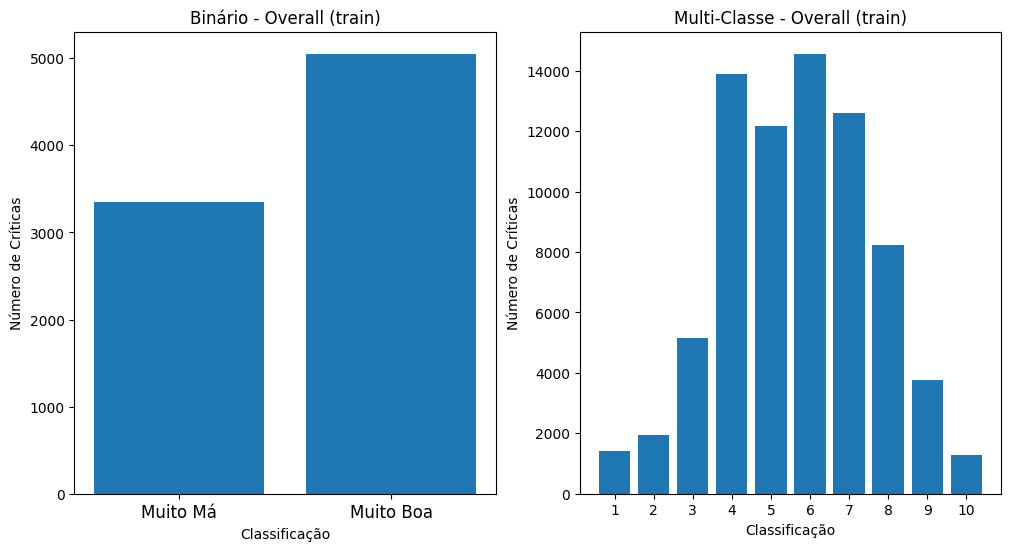

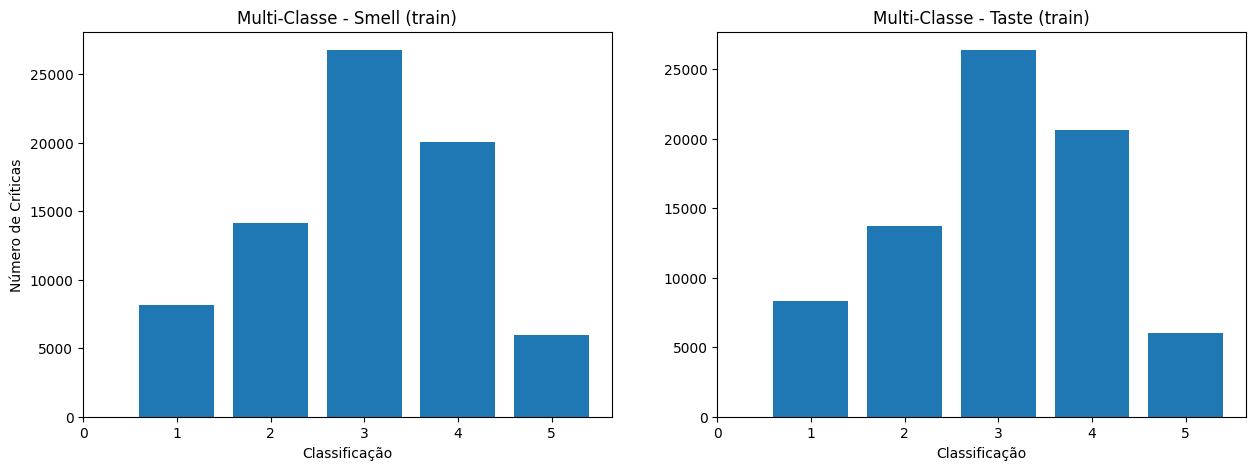

In [5]:
#Dados de Treino
overallB_train,condition = dataBin(overall_train.copy()) #Classificação binária 
overallM_train = overall_train.copy() #Classificação multi-classe
drawGraphics('train',np.delete(overallB_train,condition), overallM_train, smell_train, taste_train) 

Depois de tratamento destes dados, como podemos observar nos valores em cima apresentados, verificamos que nos dados de treino, `overallB_train`, possui-se **5052 críticas** que estão dentro da classificação **Muito boa**, e **3346 classificações** consideradas **Muito Más**. <br>
Adicionalmente para o classificador Multi-classes,`overallM_train` `smell_train` e `taste_train`, fez-se uma média para os valores de classificação e demonstrou-se também com gráficos para uma visualização mais detalhada, podendo-se concluir que os valores parecem corresponder com o indicado e pretendido por parte do enunciado.<br>

#### Análise de Dados de Teste

Criticas com avaliação muito boa (test):  1111
Criticas com avaliação muito má (test):  2429 

Média de Avaliação Overall (test):  5.047 /10
Média de Avaliação Smell (test):  2.66076 /5
Média de Avaliação Taste (test):  2.71604 /5


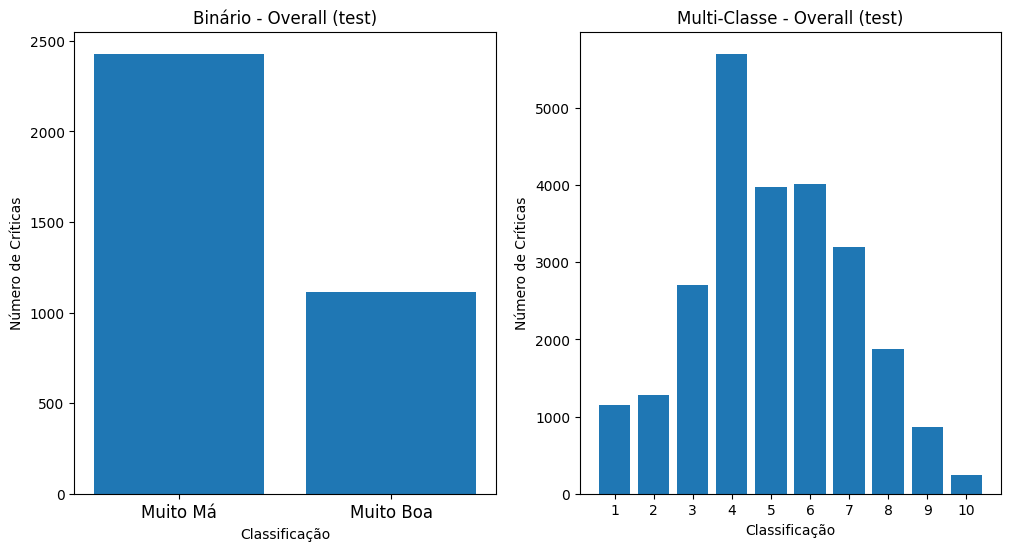

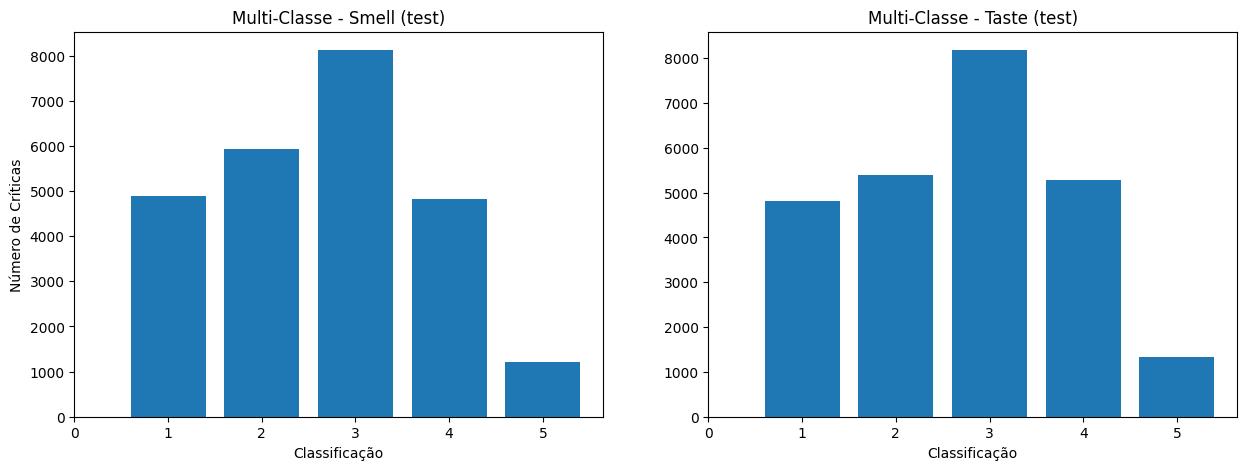

In [6]:
#Dados de Teste
overallB_test, condition = dataBin(overall_test.copy()) #Classificação binária
overallM_test = overall_test.copy() #Classificação multi-classe 
drawGraphics('test',np.delete(overallB_test,condition), overallM_test, smell_test, taste_test)

Assim como foi feito nos dados de treino, nesta parte, é apresentado as mesmas caracteristicas de avaliação dos valores de classificação e pode-se observar que, apesar de serem menos classificações que as de treino, existe uma grande quantidade de classificações que são consideradas **Muito Más (2429)**, em relação as que são consideradas **Muito Boas (1111)**.<br>
Mais uma vez foram também apresentadas os valores médios das caracteristicas para a classificação multi-classe, que em comparação com os dados de treino, apresentam uma ligeira redução das mesmas. no entanto, com a visualização dos gráficos  percebe-se que continua a haver bastantes classificações iguais a 3/5, em relação ao taste e smell, e tendo um maior peso o valor 4/10 no overalal da cerveja.<br>

Tendo esta parte concluida, segue-se para o tratamento das críticas e consequentemente a criação de um vocabulário.

## 4.2 Vocabulário <a id="desenvolvimento-2"></a>

Para a realização de uma aprendizagem automática com dados do tipo de texto, é necessário representar cada documento, neste caso cada crítica, como um vetor numérico. Para tal, é feito uma remoção das ordens das palavras, dando maior importância ao peso individual que estas terão para a classificação.<br>

O Resultado desta construção de vocabulário é a matriz `documento-termo` ou `corpus`. Resumidamente, para a inicialização do projeto ter-se-á que ter em conta os seguintes passos para a realização desta matriz:
- **Tokenization**, onde o documento é dividido em palavras, ou tokens;
- **Construção do Vocabulário**, onde se um vocabulário por todas as palavras presentes na matriz;
- **Codificação**, onde com base no vocabulário construido, se conta o número de ocorrências de cada palavra e ainda é feito uma vetorização dos documentos com valores proporcionais ao números de vezes da palavra do documento;<br>

No entanto, a realização deste algoritmo, poderá trazer algumas inconsistência para o *corpus*, devido à existência de artigos definidos/indefinidos, pronomes ou até mesmo conjunções de verbo que acabam por significar o mesmo e por isso tornam-se redundantes. A solução mais indicada, é a utilização de filtros para as palavras, com hiper-parâmetros que irão filtrar essas palavras que são irrelevantes para a classificação. 

### 4.2.1 Limpeza de Texto <a id="desenvolvimento-2-1"></a>
Para a inicialização da construção de um vocabulário é necessário começar com a  limpeza das mesmas removendo caracteres especiais e outros elementos que não sejam relevantes para a análise dos dados, para tal, foi desenvolvido o método `textCleaning`.<br>


In [7]:
Docs_test_redux = Docs_test.copy()[:25]
print('Crítica Reduzida: \n', Docs_test_redux)

Crítica Reduzida: 
 ['Tap, Toronado during CBC week.  Good oyster flavor in this beer, but the roast and hops came through too harshly for my tastes.  Earthy and a bit mineraly.  I wish that I had nabbed a bottle because I imagine that this one had a good chance of settling down and letting those salty, earthy notes combine with more of the dark chocolate lurking beneath the roast.', 'Courtesy of Degarth. Pours dark mahogany with tan head. The aroma is big with earthiness mixed with caramel covered apples, prunes, the salty seaweedy sea shore and a fish market. The taste is a bit on the thin side but smooth too with dark roasted to burnt malts, chilli pepper notes, full up fish market counter oyster juice and earthiness. In the background is a mild sense of caramel. The fish/oyster sensation works well here with the earthy hops and roasty malts. Nice.', 'Tasted on 8/1/11 from a 12oz bottle obtained in a trade, it was a bit of a gusher.  Pours thick, oily black with a massive tan head t

In [8]:
def textCleaning(documentos):
    """
    @param documentos: lista de reviews
    @param bin: se os dados forem binários
    @return documentos: lista de reviews limpos
    """
    documentos = [doc.replace('<br />', ' ') for doc in documentos]
    documentos = [re.sub(r'[^a-zA-Z\u00C0-\u00FF]+' , ' ', doc) for doc in documentos]
    return documentos

print('Crítica Original: \n', Docs_test_redux[2])
print('Tamanho da Crítica Original: ', len(Docs_test_redux[2]))
Docs_test_redux = textCleaning(Docs_test_redux)
print('Crítica Após Limpeza: \n', Docs_test_redux[2])
print('Tamanho da Crítica Após Limpeza: ', len(Docs_test_redux[2]))


Crítica Original: 
 Tasted on 8/1/11 from a 12oz bottle obtained in a trade, it was a bit of a gusher.  Pours thick, oily black with a massive tan head that slowly recedes to some spotty lace and a thin collar.  This is the first oyster stout I have ever had where the oyster is actually discernable.  There are aromas of chocolate, roasted malt, and coffee, but the overwhelming aroma is of briny and somewhat fishy oyster.  The flavor is the same, starting off with the briny and somewhat fishy taste, and then moving on to the lightly sweet chocolate, vanilla, and a hint of coconut, and finishing with bitter dark chocolate and coffee.  The body is medium with average, but stinging carbonation and a long bitter coffee, coconut, and briny finish.
Tamanho da Crítica Original:  731
Crítica Após Limpeza: 
 Tasted on from a oz bottle obtained in a trade it was a bit of a gusher Pours thick oily black with a massive tan head that slowly recedes to some spotty lace and a thin collar This is the f

Como se consegue observar, o resultado após a limpeza, mostra que os caracteres especiais e números foram removidos diminuindo o tamanho do documento acerca de 6% do seu valor original. 

### 4.2.2 TfidfVectorizer <a id="desenvolvimento-2-2"></a>
Para ajudar nesta limpeza, será também utilizado a função `TfidfVectorizer()` que é uma junção dos métodos `CountVectorizer`e `TfidfTransformer`e que tem como objetivo fazer a contagem para cada texto, do número de ocorrências de uma palavra e dar mais peso de importância a essas palavras, respetivamente. No entanto, é necessário encontrarmos os melhores parâmetros, minimo de repetição de palavra por documento (**min_df**) e **token_pattern** a serem utilizados antes de aplicar no documento.

In [9]:
min_df = [2, 3, 4]
token_pattern = [r'\b\w\w+\b', r'\b\w\w\w+\b', r'\b\w\w\w\w+\b']
for df in min_df:
    for token_pat in token_pattern:
        vectorizer = TfidfVectorizer(min_df=df, token_pattern=token_pat)
        vectorizer.fit(Docs_test_redux)
        print('Número de Tokens (min_df =',df,') (token_pattern =',token_pat,'):', len(vectorizer.get_feature_names_out()))
        print('Tokens (min_df =',df,') (token_pattern =',token_pat,'):''\n', vectorizer.get_feature_names_out(),'\n')

Número de Tokens (min_df = 2 ) (token_pattern = \b\w\w+\b ): 217
Tokens (min_df = 2 ) (token_pattern = \b\w\w+\b ):
 ['actually' 'aftertaste' 'ale' 'almost' 'amber' 'an' 'and' 'any' 'are'
 'aroma' 'aromas' 'around' 'as' 'at' 'average' 'back' 'bad' 'balanced'
 'be' 'beer' 'better' 'big' 'bit' 'bitter' 'bitterness' 'black' 'bodied'
 'body' 'bottle' 'brew' 'briny' 'brown' 'burnt' 'but' 'by' 'caramel'
 'carbonation' 'character' 'chocolate' 'christmas' 'citrus' 'clear'
 'cocoa' 'coffee' 'color' 'colored' 'copper' 'courtesy' 'creamy' 'crisp'
 'dark' 'decent' 'deep' 'definitely' 'degarth' 'dense' 'did' 'diminished'
 'disappointing' 'down' 'drink' 'dry' 'drying' 'earthy' 'easy' 'eda' 'end'
 'ever' 'expecting' 'faint' 'fairly' 'fine' 'finish' 'first' 'flavor'
 'flavors' 'foam' 'for' 'from' 'fruit' 'fruity' 'full' 'glass' 'going'
 'good' 'guess' 'had' 'has' 'have' 'head' 'heavy' 'herbal' 'here' 'hint'
 'hop' 'hops' 'huge' 'if' 'in' 'intense' 'is' 'isnt' 'it' 'its' 'itself'
 'ive' 'just' 'khaki' 

De acordo com os resultados anteriormente apresentados chegou-se a conclusão que os melhores parâmetros a utilizar seriam aqueles onde houvesse uma redução significativa das palavras e que não retirasse informação necessária para o algoritmo, e por isso, conclui-se o seguinte:
- **min_df** = 3
- **token_pattern** = \b\w\w\w+\b

### 4.2.3 Stemmer <a id="desenvolvimento-2-3"></a>
Para finalizar a limpeza das criticas é utilizado um **stemmer**, que é o processo de transformar uma palavra na sua raiz, acabando por fazer uma junção de palavras semelhantes. Na Unidade Curricular foram leccionadas, três tipos de Stemmers:
- `Porter Stemmer`: Algoritmo que remove sufixos comuns a plavras para reduzir a sua forma raiz; 
- `Snowball Stemmer`: Uma versão melhorada de Porter Stemmer, com um suporte em várias linguas;
- `Lancaster Stemmer`: Uma versão mais agressiva que o Porter Stemmer; 

In [10]:
def Stemmer(stemmer, documentos):
    Docs = [' '.join(stemmer.stem(w) for w in doc.split()) for doc in documentos]
    tfidf = TfidfVectorizer(min_df=3, token_pattern=r'\b\w\w\w\w+\b').fit(Docs)
    return tfidf

stemmer1 = PorterStemmer()
stemmer2 = SnowballStemmer('english')
stemmer3 = LancasterStemmer()

#Criar Representação tfidf
tfidf1 = Stemmer(stemmer1,textCleaning(Docs_test))
tfidf2 = Stemmer(stemmer2,textCleaning(Docs_test))
tfidf3 = Stemmer(stemmer3,textCleaning(Docs_test))

#Verificação de tokens agrupados por stemmer
print('Número de Tokens com PorterStemmer: ', len(np.unique(tfidf1.get_feature_names_out())))
print('Número de Tokens com SnowballStemmer: ', len(np.unique(tfidf2.get_feature_names_out())))
print('Número de Tokens com LancasterStemmer:', len(np.unique(tfidf3.get_feature_names_out())))

Número de Tokens com PorterStemmer:  8833
Número de Tokens com SnowballStemmer:  8708
Número de Tokens com LancasterStemmer: 6991


O melhor procedimento aqui é selecionar um stemmer que nos forneça um agrupamento significativo de palavras e que ao mesmo tempo não retire "chaves" essenciais para a classificação dos textos feitos pelos criticos.<br>
Por isso, conclui-se que o melhor stemmer a utilizar será o $\textit{\textbf{SnowballStemmer}}$, pois este não apresenta um agrupamento básico como o PorterStemmer, nem um agrupamento muito rigoroso como o LancasterStemmer.

Antes de terminar a este secção de limpeza dos dados, é feito a execução dos processos anteriormente explicados nos dados fornecidos. Para facilitar estes processos foi desenvolvido um método adicional,`text2Vector()` que irá ter como retorno o vocabulário, percorrendo todos os processos até ao seu resultado final.  

In [11]:
def DocsToVector(Docs_trans):
    """
    """
    stemFunc = SnowballStemmer('english')
    Docs_fit = textCleaning(Docs_train)
    Docs_trans1 = textCleaning(Docs_trans)

    Docs_fit =  [' '.join(stemFunc.stem(w) for w in doc.split()) for doc in Docs_fit]
    Docs_trans1 =  [' '.join(stemFunc.stem(w) for w in doc.split()) for doc in Docs_trans1]

    tfidf = TfidfVectorizer(min_df=3, token_pattern=r'\b\w\w\w+\b').fit(Docs_fit)
    tokens = tfidf.get_feature_names_out()
    return tokens, tfidf.transform(Docs_trans1).toarray()

tokens_train, tfidf_Docs_train  = DocsToVector(Docs_train)
tokens_test, tfidf_Docs_test, = DocsToVector(Docs_test)

print('Número de Tokens no Corpus de Treino:', len(tokens_train))
print('Número de Tokens no Corpus de Teste:', len(tokens_test))

Número de Tokens no Corpus de Treino: 15179
Número de Tokens no Corpus de Teste: 15179


Foi ainda desenvolvido dois métodos auxiliares que irão ajudar para o resto do desenvolvimento do projeto, `saveFile()` e `loadFile()`. Como os nomes indicam, servirão para guardar e ler ficheiros de format pickle, este procedimento irão facilitar o uso de certos conteúdos que demoram bastante tempo a ser processados. 

In [12]:
def saveFile(name, content):
    """
    Criação de ficheiro pickle com os dados para uma melhor e mais rápida manipulação dos mesmos.
    @param name: nome do ficheiro
    @param content: conteúdo do ficheiro
    """
    with open(name+".p", 'wb') as f:
        pickle.dump(content, f)


def loadFile(name):
    """
    Leitura do ficheiro pickle com os dados, para uma melhor e mais rápida manipulação dos mesmos.
    @param name: nome do ficheiro
    @return pickle.load(f): conteúdo do ficheiro
    """
    with open(name+".p", 'rb') as f:
        return pickle.load(f)

data_train = {"tokens": tokens_train, "tfidf_Docs": tfidf_Docs_train}
data_test = {"tokens": tokens_test, "tfidf_Docs": tfidf_Docs_test}
saveFile('Dados/tfidf_train',data_train)
saveFile('Dados/tfidf_test',data_test)

<hr>

## 4.3 Classificadores <a id="desenvolvimento-3"></a>

Após o tratamento do vocabulário e criação do corpus, para as classificações, começa-se então o desenvolvimento de treino dos dados fornecidos com os diferentes classificadores. Como foi mencionado na introdução, haverá dois tipos de classificação neste projeto, classifcação binária e classificação multi-classes que serão explicadas mais detalhadamente nas suas respetivas secções. No entanto é de realçar que para estas classificações serão utilizadas as seguintes técnicas para cada uma delas:
- Classificação Binária: SVM e Regressão Logistica;
- Classificação Multi-Classe: SVM;

A **Regressão Logística**, é uma técnica que é frequentemente utilizada quando a variável é categórica e binária, uma vez que esta técnica tem como base uma transformação linear, seguida de uma não-linearidade e é usado para estimar um conjunto de valores, tendo como dados disponíveis os dados de entrada e as saídas desejadas, sendo por isso um ótimo classificador para a classificação binária. É de salientar que este classificador tem opções de regularização "**Lasso**" e "**Ridge**" (ou "L1" e "L2", respetivamente), onde o primeiro permite acrescentar a função de custo a uma outra função de custo e o último permite pôr vários dos valores dos pesos a 0 se esses tiverem dimensões muito altas. Resumidamente, este classifcador apresenta boas vantagens como, apresentar bons resultados quando o conjunto de dados é linearmente separável, é um classificador de fácil implementação e eficiente, mas no entanto, é um mau classificador para dados com classes não binárias pois uma vez que estas não são linearmente separáveis.

As **Máquinas de Suporte Vetorial (SVM)** são técnicas que são frequentemente utilizadas em classificações binárias, onde estas irão separar as classes em análise de modo a que a margem entre estas seja a maior possível sendo os vetores que estão mais próximos da margem das classes, os vetores de suporte. Também este classificador utiliza as mesmas opções de regularição que a Regressão Logistica (Ridge e/ou Lasso). Resumidamente este classificador apresenta bons resultadois em problemas de classificação com dados de alta dimensão, como neste projeto nos é apresentado. A sua desvantagem é o facto de ser um classifcidaor muito sensível aos parâmetros que lhe são fornecidos nomeadamente os parâmetros de regularização C e o tipo de kernel. Neste projeto tenciona-se também utilizar este classificador também na classificação multi-classe aparenta ser um bom candidato no análise de dados multi-classe, ao contrário da Regressão Logistica.

Para a apresentão de dados relativos as informações provenientes do uso dos classificadores mencionados anteriormente, foram desenvolvidos os  métodos `crossValidationScore`, que tem como objetivo a apresentação dos melhores valores de penalização ( **_penalty_** ) e de de regularização ( **_C_** ), `Results`, apresenta os resultados do classificador usado, com os seus melhores parâmetros molstarndo o tamamnho do vocabulário, o número de erros de teste e ainda a sua matriz de confusão, finalmente foi desenvolvido o método `Vocabulary`que apesar de ser utilizado maioritarimente no classificador binário é utilizado para a apresentação das 10 palavras mais relevantes e ainda um gráfico com as mesmas.

In [13]:
def crossValidationScore(data,type):
    scores = data['scores']
    intervalo = int(len(data['parametros'])/2)
    Cs = np.arange(1, 5, 0.5) 
    resultados_L1 = scores[:intervalo]
    resultados_L2 = scores[intervalo:2*intervalo]

    print('Melhor C da Penalização L1: ', Cs[np.argmax(resultados_L1)], '| Pior C da Penalização L1: ', Cs[np.argmin(resultados_L1)])
    print('Melhor C de Penalização L2: ', Cs[np.argmax(resultados_L2)], '| Pior C de Penalização L2: ', Cs[np.argmin(resultados_L2)], '\n')

    print('Acerto de Validação do Melhor C da Penalização L1:', np.max(resultados_L1))
    print('Acerto de Validação do Melhor C da Penalização L2:', np.max(resultados_L2), '\n')

    plt.figure(figsize=(10,6))
    plt.plot(Cs, resultados_L1,  '-X')
    plt.plot(Cs, resultados_L2, '-X')
    plt.title("Cross Validation Score "+type)
    plt.xlabel('Valores de C')
    plt.ylabel('Acertos de Validação')
    plt.legend(('l1', 'l2'))
    plt.grid()


def Results(tokens,svm,X,overallB,type):
    score = "Score: "+str(np.round(svm.score(X,overallB)*100,2))+"%"
    print("Tamanho de Vocabulário ("+type+"): ", len(tokens),"| "+ score)
    print('Número de Erros Teste: ', np.sum(overallB != svm.predict(X)))
    print("Matriz de Confusão: \n", confusion_matrix(overallB, svm.predict(X)),"\n")

def RocCurve(svm,X,overallB,type):
    MC = confusion_matrix(overallB, svm.predict(X))
    tp = MC[0,1]/(MC[0,1] + MC[0,0])#True Positive - TP/(TP+FN)
    fp = MC[1,1]/(MC[1,1] + MC[1,0])#False Positive - FP/(FP+TN)

    fpr, tpr, thresholds = roc_curve(overallB, svm.decision_function(X))
    plt.figure(figsize=(10, 6))
    plt.plot(fpr,tpr, label='Curva ROC '+type)
    plt.plot(tp, fp, 'X', label='Ponto Operacional')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid()
        

def Vocabulary(svm):
    w = svm.coef_.squeeze()
    idx = np.argsort(w)
    voc = [tokens_test[i] for i in idx]
    print('Palavras mais relevantes para a classificação: ', voc[-10:])
    plt.figure(figsize=(10, 10))
    plt.title('Ordenação dos pesos')
    plt.barh(voc[:15], w[idx][:15])
    plt.barh(voc[-15:], w[idx][-15:])
    plt.axis('equal')
    plt.show() 

tokens_train,X1 = loadFile("Dados/tfidf_train")["tokens"], loadFile("Dados/tfidf_train")["tfidf_Docs"]
tokens_test,X2 = loadFile("Dados/tfidf_test")["tokens"], loadFile("Dados/tfidf_test")["tfidf_Docs"]
print("Tokens de Treino: ", len(tokens_train),"| Tokens de Teste: ", len(tokens_test))
print("Dimensão de X1: ", X1.shape, "| Dimensão de X2: ", X2.shape)   

Tokens de Treino:  15179 | Tokens de Teste:  15179
Dimensão de X1:  (75000, 15179) | Dimensão de X2:  (25000, 15179)


### 4.3.1 Classificação Binária <a id=desenvolvimento-3-1></a>
Segundo o enunciado, _Nesta tarefa, pretende-se saber se o crítico considera a cerveja muito boa ou muito má, baseado no que escreveu. Considere que uma cerveja e considerada muito boa quando obteve uma pontuação global (campo overall) de 9 ou mais valores. Considere ainda que
uma cerveja é considerada muito má quando obteve uma pontuação global de 2 ou menos valores._, por isso para proceder nesta tarefa foi desenvolvido o seguinte raciocínio:
- 1º Fazer a limpeza de Vocabulário com  a aplicação de Stemmers e transformção no corpus;
- 2º Separação das classificações de muito boa e muito má, em duas matrizes diferentes correspondendo ao seu valor binário (positivo ou negativo);
- 3º Fazer uma verificação e obtenção dos melhores parâmetros para o classificador, com os dados de treino;
- 4º Aplicar estes parâmetros no classificador e fazer a classificação final;
- 5º Apresentação de dados finais e conclusão;

Para realizar a separação das clkassificações, foi desenvolvido op método `dataBin_reformed` que reutiliza um método anteriormente utilizado `dataBin`e que vai criar as duas matrizes mencionadas anteriormente. Também na célula seguinte pode-se observar que é inicilizado as variaveis `Docs_train`, `overall_train`, `Docs_test`e `overall_test` que vão ser obtidas dos dados fornecidos depois de serem tratados no método `DeconstructionDict`, posteriormente os dados de overall dos dois tipos de ficheiro vão ser tratados a sua separação para esta classificação e os textos serão limpos das suas redundâncias.


In [14]:
def dataBin_reformed(data):
    """
    Méotdo vai transformar todos os valores dos dados em binário
    e separar em dois arrays diferentes um só com positivos e outro só com negativos
    ambos os arrays terão a mesam diemnsão mas diferenciam o valor binario de acordo com
    a classificação; 1 para positivo e 0 para negativo
    """
    dataB, _ = dataBin(data)
    data_pos = []
    data_neg = []
    for i in range(len(dataB)):
        if dataB[i] == 1:
            data_pos.append(1)
            data_neg.append(0)
        elif dataB[i] == 0:
            data_pos.append(0)
            data_neg.append(1)
        else:
            data_pos.append(0)
            data_neg.append(0)
    
    return np.array(data_pos), np.array(data_neg)

Docs_train, overall_train,_,_ = DeconstructDict(loadFile('Dados/rateBeer75Ktrain'))
Docs_test, overall_test,_,_ = DeconstructDict(loadFile('Dados/rateBeer25Ktest'))

overallB_train_pos, overallB_train_neg = dataBin_reformed(overall_train)
overallB_test_pos, overallB_test_neg = dataBin_reformed(overall_test)

Docs_train_cleaned = textCleaning(Docs_train)
Docs_test_cleaned = textCleaning(Docs_test)

#### 4.3.1.1 SVM <a id=desenvolvimento-3-1-1></a>
##### Encontrar Melhores Parâmetros

In [15]:
def SVM_bestCP_finder(overallB,Docs):
    Docs1, Docs2, y1, y2 = train_test_split(Docs, overallB, test_size=1/3, stratify=overallB)
    Docs1t, Docs1v, y1t, y1v = train_test_split(Docs1, y1, test_size=1/2, stratify=y1)

    tfidf = TfidfVectorizer(min_df=3, token_pattern=r'\b\w\w\w+\b').fit(Docs1)
    X1v = tfidf.transform(Docs1v)

    Cs = np.arange(1, 5, 0.5) 
    Penalty = ['l1', 'l2'] 
    tuple_CP = [(p, c) for p in Penalty for c in Cs]
    resultados_CP = []
    for p, c in tuple_CP:
        print(p, c)
        svm = LinearSVC(dual=False, penalty=p, C=c, max_iter=5000, tol=1e-2)
        scores = cross_val_score(svm, X1v, y1v, cv=5)
        resultados_CP.append(np.mean(scores))
    data = {'parametros': tuple_CP, 'scores': resultados_CP}
    return data

Melhor C da Penalização L1:  1.0 | Pior C da Penalização L1:  4.5
Melhor C de Penalização L2:  1.0 | Pior C de Penalização L2:  4.5 

Acerto de Validação do Melhor C da Penalização L1: 0.93312
Acerto de Validação do Melhor C da Penalização L2: 0.93312 



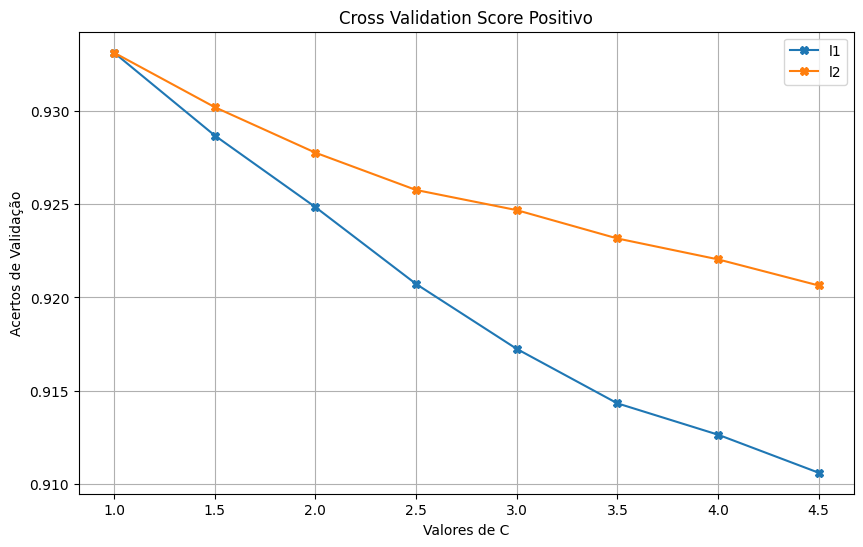

In [16]:
data = loadFile("Dados/bin/svm/parametrosLinearSVC_pos")
crossValidationScore(data, "Positivo")

Segundo os valores obtidos, e o gráfico demonstrado acima, podemos verificar que os melhores valores a utilizar para os valores positivos neste tipo de classificador são: $\textbf{C = 1}$ com uma penalização $\textbf{L2}$. Os melhores valores de acerto para L1 e L2 são iguais sendo esse valor de 93.31% como podemos observar, mas conforme for maior o valor de C tanto a penalização L1 e L2 apresentão um descrescimo sendo mais acentuado em L1. 

Melhor C da Penalização L1:  1.0 | Pior C da Penalização L1:  4.5
Melhor C de Penalização L2:  1.0 | Pior C de Penalização L2:  4.5 

Acerto de Validação do Melhor C da Penalização L1: 0.8886
Acerto de Validação do Melhor C da Penalização L2: 0.8880799999999999 



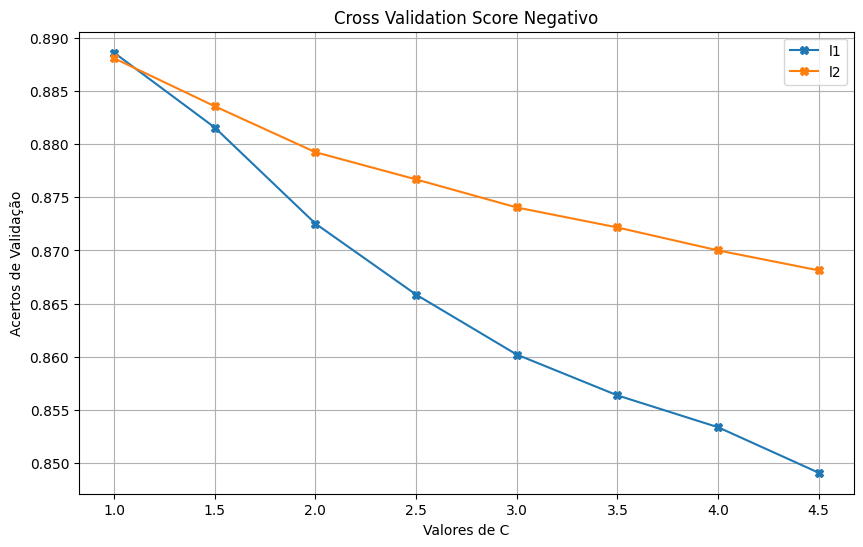

In [17]:
data = loadFile("Dados/bin/svm/parametrosLinearSVC_neg")
crossValidationScore(data,"Negativo")

Para os casos negativos, podemos observar no gráfico acima que os melhores parâmetros mais uma vez são $\textbf{C = 1}$ e para a penalidade será o regularizador $\textbf{L1}$. Também aqui existe um decréscimo percentual dos acertos de validação à medida que o valor do C é maior e mais uma vez, devido a exigencia da penalidade L1, este é o que sofre mais. É de realçar que a diferença percentual das duas penalizações é de 0.06%. 

##### Treino do Classificador

In [18]:
def SVM_Classifier(X_train,y_train, p, c, filepath):
    svm = LinearSVC(dual=False, penalty=p, C=c, max_iter=5000, tol=1e-2).fit(X_train,y_train)
    saveFile("Dados/"+filepath, svm)

SVM_Classifier(X1,overallB_train_pos, 'l2', 1, 'bin/svm/modeloLinearSVC_train_pos')
SVM_Classifier(X1,overallB_train_neg, 'l1', 1, 'bin/svm/modeloLinearSVC_train_neg')
svm_ts_pos = loadFile("Dados/bin/svm/modeloLinearSVC_train_pos")
svm_ts_neg = loadFile("Dados/bin/svm/modeloLinearSVC_train_neg")

##### Resultados

Tamanho de Vocabulário (Treino Positivo):  15179 | Score: 95.07%
Número de Erros Teste:  3696
Matriz de Confusão: 
 [[69693   255]
 [ 3441  1611]] 

Tamanho de Vocabulário (Treino Negativo):  15179 | Score: 96.97%
Número de Erros Teste:  2273
Matriz de Confusão: 
 [[71466   188]
 [ 2085  1261]] 

Tamanho de Vocabulário (Teste Positivo):  15179 | Score: 95.48%
Número de Erros Teste:  1130
Matriz de Confusão: 
 [[23735   154]
 [  976   135]] 

Tamanho de Vocabulário (Teste Negativo):  15179 | Score: 91.92%
Número de Erros Teste:  2019
Matriz de Confusão: 
 [[22366   205]
 [ 1814   615]] 

Palavras mais relevantes para a classificação:  ['connoisseur', 'exquisit', 'amaz', 'heaven', 'champang', 'phenomen', 'outstand', 'loaf', 'finest', 'masterpiec']


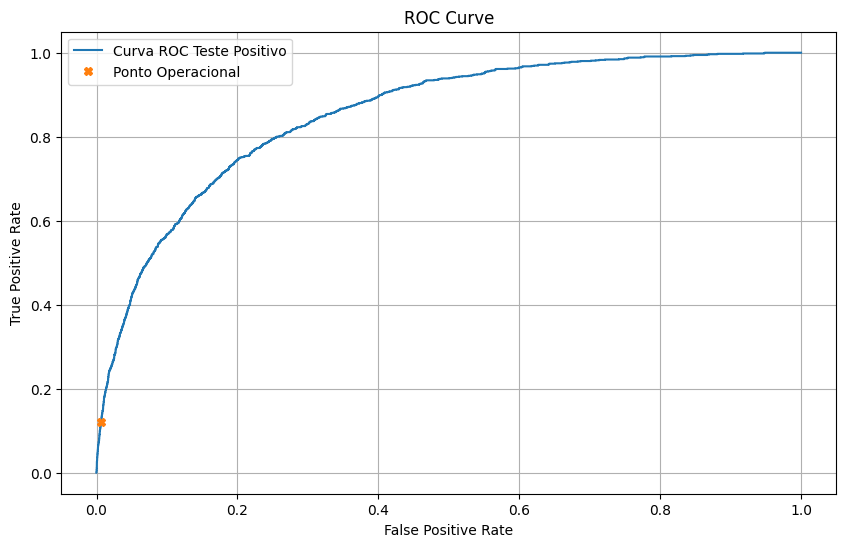

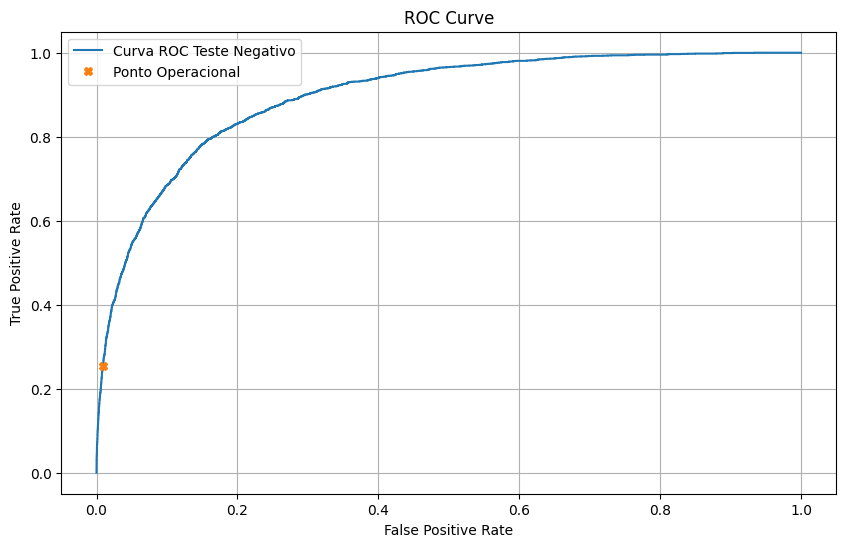

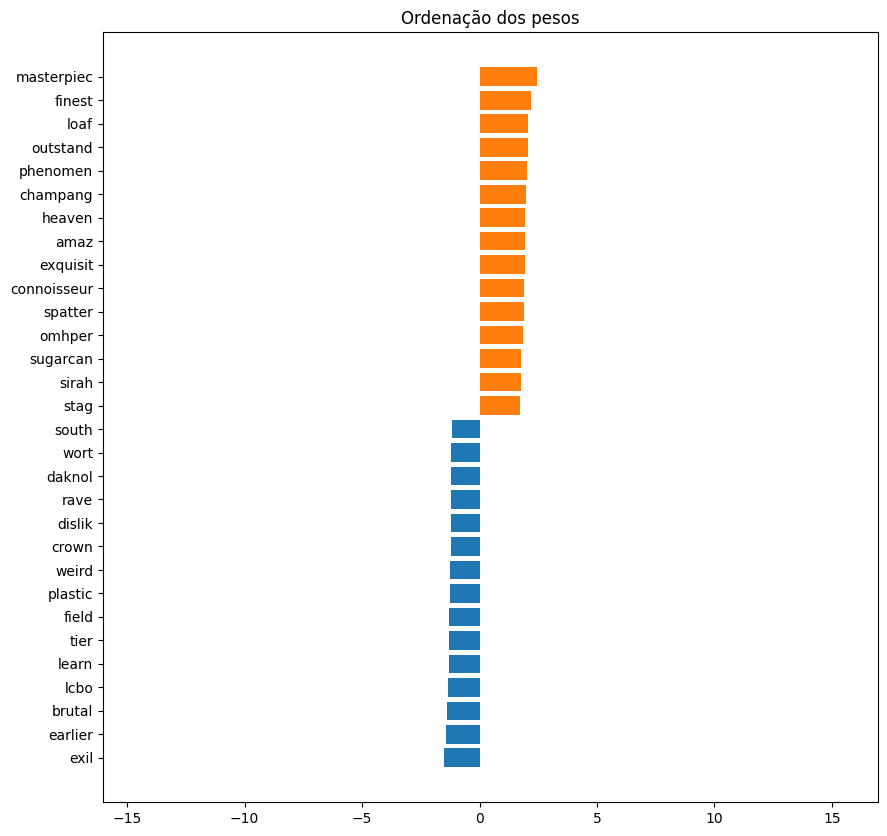

Palavras mais relevantes para a classificação:  ['disgust', 'rude', 'passport', 'retard', 'tes', 'guatemalan', 'gross', 'uhm', 'alki', 'ocalyps']


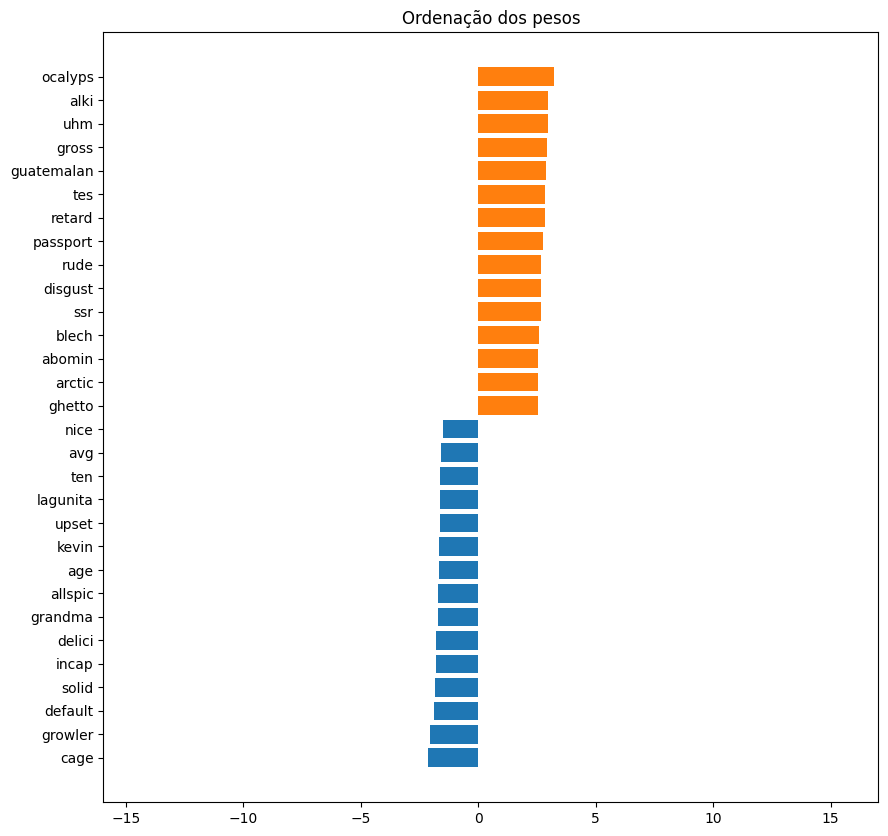

In [19]:
Results(tokens_train,svm_ts_pos,X1,overallB_train_pos,"Treino Positivo")
Results(tokens_train,svm_ts_neg,X1,overallB_train_neg,"Treino Negativo")
Results(tokens_test,svm_ts_pos,X2,overallB_test_pos,"Teste Positivo")
Results(tokens_test,svm_ts_neg,X2,overallB_test_neg,"Teste Negativo")

RocCurve(svm_ts_pos,X2,overallB_test_pos,"Teste Positivo")
RocCurve(svm_ts_neg,X2,overallB_test_neg,"Teste Negativo")

Vocabulary(svm_ts_pos)
Vocabulary(svm_ts_neg)

A conclusão que se obtem deste classificador é que se obtém um resultado extremamente positivo para ambos os casos de comentários tendo um resultado em média de 94.16% e apenas 2914 erros da sua totalidade. Os gráficos em cima apresentam nos as palavras coms maior pesos nas duas matrizes tendo na positiva **'masterpiec' , 'finest','loaf'** no top 3 e na negativa **'ocalyps','alki', 'uhm'** 

#### 4.3.1.2 Regressão Logistica <a id=desenvolvimento-3-1-2></a>
##### Encontrar os Melhores Valores

In [20]:
def RL_bestCP_finder(y,Docs,s='liblinear',Cs = np.arange(1, 5, 0.5)):
    Docs1, Docs2, y1, y2 = train_test_split(Docs, y, test_size=1/3, stratify=y)
    Docs1t, Docs1v, y1t, y1v = train_test_split(Docs1, y1, test_size=1/2, stratify=y1)
    tfidf = TfidfVectorizer(min_df=3, token_pattern=r'\b\w\w\w+\b').fit(Docs1)
    X1v = tfidf.transform(Docs1v)

    Penalty = ['l1', 'l2'] 
    tuple_CP = [(p, c) for p in Penalty for c in Cs]
    resultados_CP = []
    for p, c in tuple_CP:
        print(p, c)
        dl = LogisticRegression(penalty=p, C=c, random_state=42, solver=s,max_iter=5000)
        scores = cross_val_score(dl, X1v, y1v, cv=5)
        resultados_CP.append(np.mean(scores))
    data = {'parametros': tuple_CP, 'scores': resultados_CP}
    return data

Melhor C da Penalização L1:  1.5 | Pior C da Penalização L1:  4.5
Melhor C de Penalização L2:  1.5 | Pior C de Penalização L2:  4.5 

Acerto de Validação do Melhor C da Penalização L1: 0.9341200000000001
Acerto de Validação do Melhor C da Penalização L2: 0.9346 



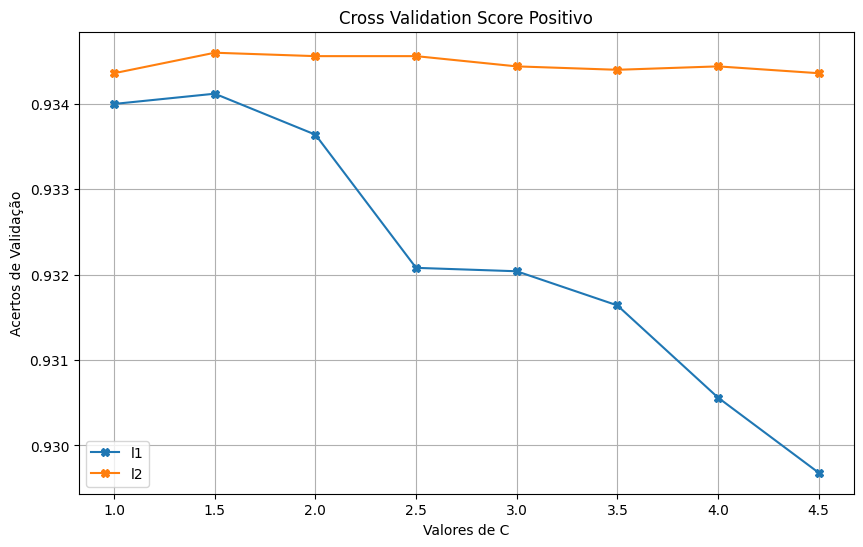

In [21]:
data = loadFile("Dados/bin/rl/parametrosRegLog_pos")
crossValidationScore(data,"Positivo")

Ao contrário ao que foi apresentado na validação cruzada da matriz positiva do SVM, neste classificador os valores são superiores e como uma maior diferença entre penalçizações, como podemos ver no gráfico acima, para este caso, a penalização L2 apresenta sempre uma melhor classificação comparativamente a L1 e tendo o seu melhor ponto quando C = 2. Por isso os parâmetros a serem utilizados nesta matriz serão $\textbf{C = 1.5 e penalty = L2}$, a diferença entre as penalizações nos seus melhores pontos é de 0.05%

Melhor C da Penalização L1:  1.5 | Pior C da Penalização L1:  4.5
Melhor C de Penalização L2:  4.5 | Pior C de Penalização L2:  1.0 

Acerto de Validação do Melhor C da Penalização L1: 0.95828
Acerto de Validação do Melhor C da Penalização L2: 0.9588800000000001 



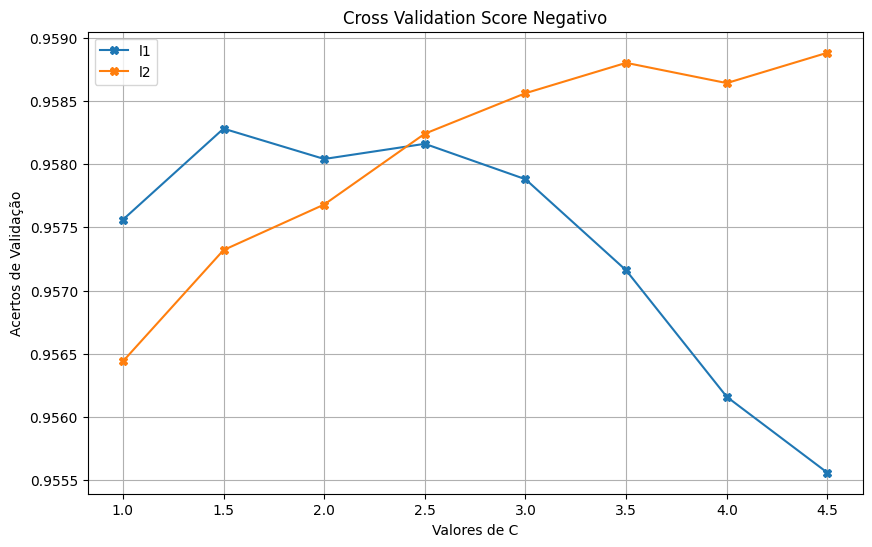

In [22]:
data = loadFile("Dados/bin/rl/parametrosRegLog_neg")
crossValidationScore(data,"Negativo")

Neste gráfico podemos observar que o melhor valor a utilizar serão uma penalização $\textbf{L2}$ com a regularização igual a $\textbf{4.5}$, vemos que o valor de L2 parece estar a tender para valores superiores quando C for cada vez maior, ao contrário de L1

##### Treino Classificador

In [23]:
def RL_Classifier(X_train,y_train, p, c, filepath, s='liblinear'):
    dl = LogisticRegression(penalty=p, C=c, random_state=42, solver = s ,max_iter=5000).fit(X_train,y_train)
    saveFile("Dados/"+filepath, dl)

RL_Classifier(X1,overallB_train_pos, 'l2', 1.5, 'bin/rl/modeloRL_train_pos')
RL_Classifier(X1,overallB_train_neg, 'l2', 4.5, 'bin/rl/modeloRL_train_neg')
rl_ts_pos = loadFile("Dados/bin/rl/modeloRL_train_pos")
rl_ts_neg = loadFile("Dados/bin/rl/modeloRL_train_neg")

##### Resultados

Tamanho de Vocabulário (Treino Positivo):  15179 | Score: 94.16%
Número de Erros Teste:  4381
Matriz de Confusão: 
 [[69595   353]
 [ 4028  1024]] 

Tamanho de Vocabulário (Treino Negativo):  15179 | Score: 97.07%
Número de Erros Teste:  2200
Matriz de Confusão: 
 [[71434   220]
 [ 1980  1366]] 

Tamanho de Vocabulário (Teste Positivo):  15179 | Score: 95.55%
Número de Erros Teste:  1113
Matriz de Confusão: 
 [[23763   126]
 [  987   124]] 

Tamanho de Vocabulário (Teste Negativo):  15179 | Score: 92.18%
Número de Erros Teste:  1955
Matriz de Confusão: 
 [[22319   252]
 [ 1703   726]] 

Palavras mais relevantes para a classificação:  ['wow', 'best', 'awesom', 'favorit', 'perfect', 'fantast', 'wonder', 'excel', 'amaz', 'outstand']


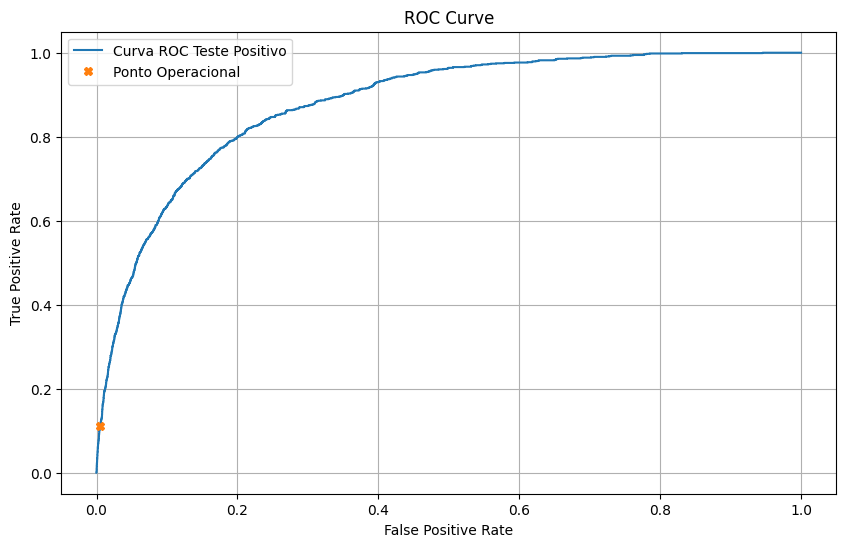

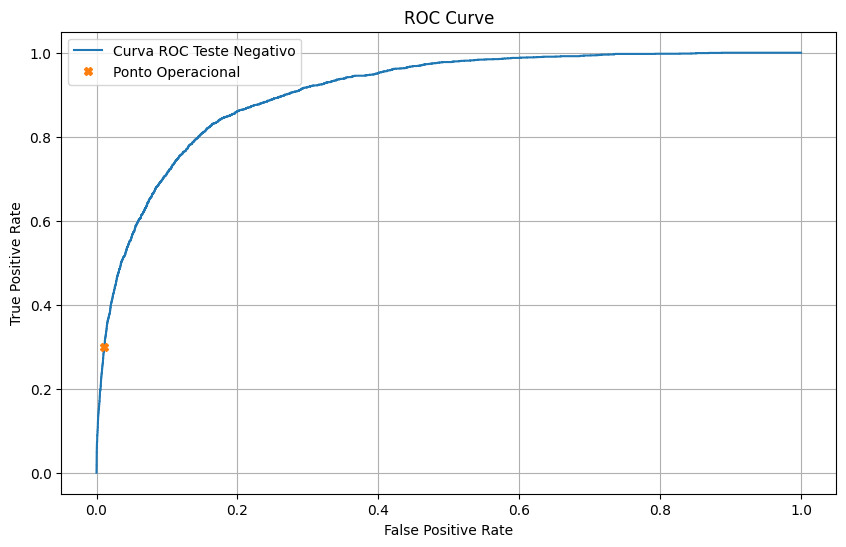

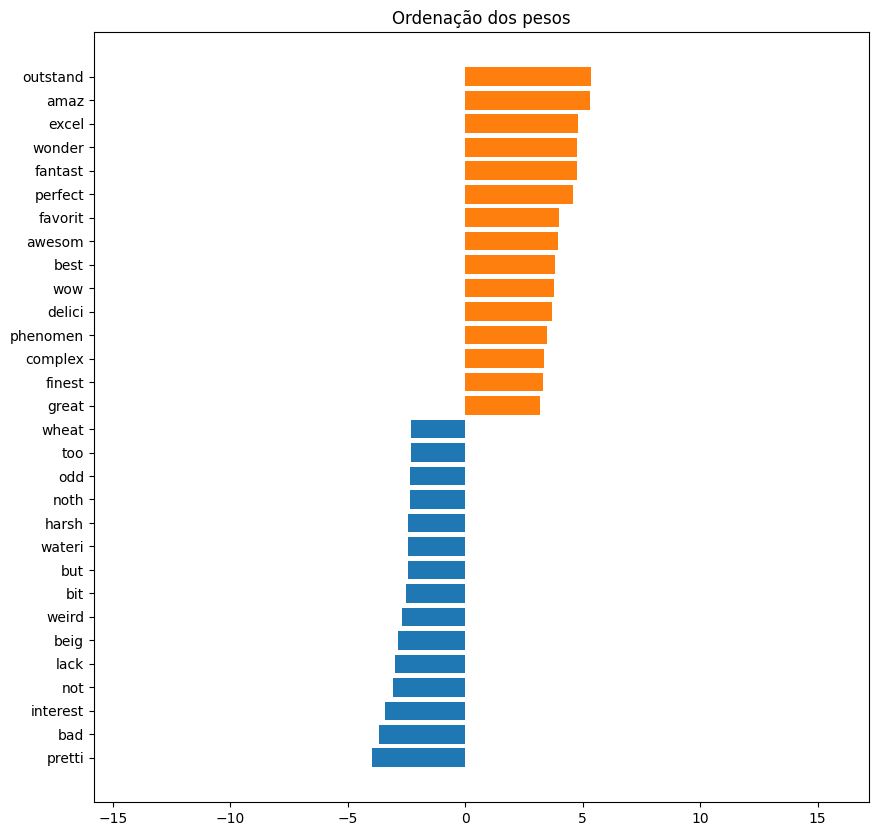

Palavras mais relevantes para a classificação:  ['rude', 'unpleas', 'wateri', 'cardboard', 'nasti', 'disgust', 'gross', 'infect', 'drain', 'alki']


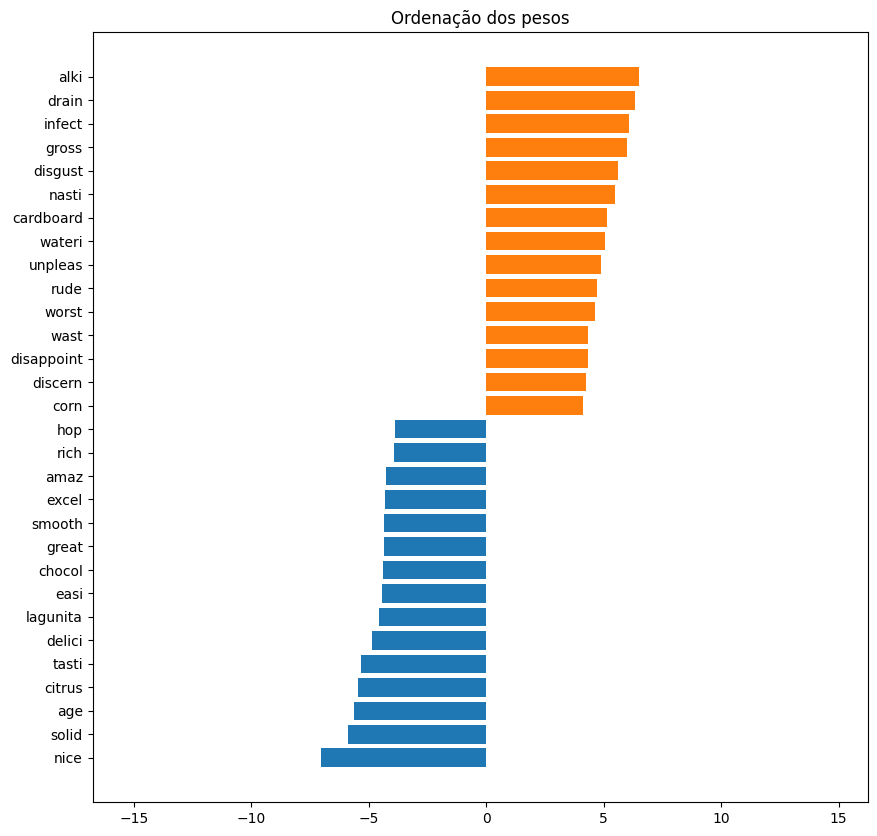

In [24]:
Results(tokens_train,rl_ts_pos,X1,overallB_train_pos,"Treino Positivo")
Results(tokens_train,rl_ts_neg,X1,overallB_train_neg,"Treino Negativo")
Results(tokens_test,rl_ts_pos,X2,overallB_test_pos,"Teste Positivo")
Results(tokens_test,rl_ts_neg,X2,overallB_test_neg,"Teste Negativo")

RocCurve(rl_ts_pos,X2,overallB_test_pos,"Teste Positivo")
RocCurve(rl_ts_neg,X2,overallB_test_neg,"Teste Negativo")

Vocabulary(rl_ts_pos)
Vocabulary(rl_ts_neg)

Finalmente observamos que o resultado médio deste classificador é igual a 93.86%, com uma totalidade de 3326 erros. Os gráficos de Vocabulários acima apresentados mostra-nos que o top 3 de palavras com maior pesos positvos é 'outstand','amaz','excel' e negativo 'alki','drain','infect' 

### 4.3.2 Classificação Multi-Classe <a id=desenvolvimento-3-2></a>
Nesta Secção, segundo o enunciado, _Prever a pontuação de três aspetos das crı́ticas (smell, taste e overall). Neste ponto, treine e avalie os classificadores com os dados de treino e verifique se as estimativas do desempenho condizem com os resultados obtidos no conjunto de teste_. Por isso, foi utilizado o mesmo raciocinio que na classificação binária onde:
- 1º Fazer a limpeza de Vocabulário com  a aplicação de Stemmers e transformção no corpus;
- 2º Fazer uma verificação e obtenção dos melhores parâmetros para o classificador, com os dados de treino;, para cada característica (overall,smell e taste)
- 3º Aplicar estes parâmetros no classificador e fazer a classificação final;
- 4º Apresentação de dados finais e conclusão;

Para a obtenção dos melhores parâmetros e classificação final, é utilizado os métodos `SVM_bestCP_finder()` e `SVM_Classifier` que foram desenvolvidos na classificação binária. Adicionalmente foi desenvolvido um método `drawConfusionMatrix` que vai apresentar gráficamente as matrizes de confusão
#### 4.3.2.1 SVC <a id=desenvolvimento-3-2-1></a>

In [25]:
def drawConfusionMatrix(CM_tuple):
    _, axs = plt.subplots(1, len(CM_tuple), figsize=(5*len(CM_tuple), 5))
    for i in range(len(CM_tuple)):
        axs[i].imshow(CM_tuple[i][0],cmap='gray')
        axs[i].set_title('Confusion Matrix '+CM_tuple[i][1])
    plt.show()

Docs_train, overall_train,smell_train,taste_train = DeconstructDict(loadFile('Dados/rateBeer75Ktrain'))
Docs_test, overall_test,smell_test,taste_test = DeconstructDict(loadFile('Dados/rateBeer25Ktest'))

Docs_train_cleaned = textCleaning(Docs_train)
Docs_test_cleaned = textCleaning(Docs_test)

##### Encontrar Melhores Parâmetros

Melhor C da Penalização L1:  1.0 | Pior C da Penalização L1:  4.5
Melhor C de Penalização L2:  1.0 | Pior C de Penalização L2:  4.5 

Acerto de Validação do Melhor C da Penalização L1: 0.26212
Acerto de Validação do Melhor C da Penalização L2: 0.26 



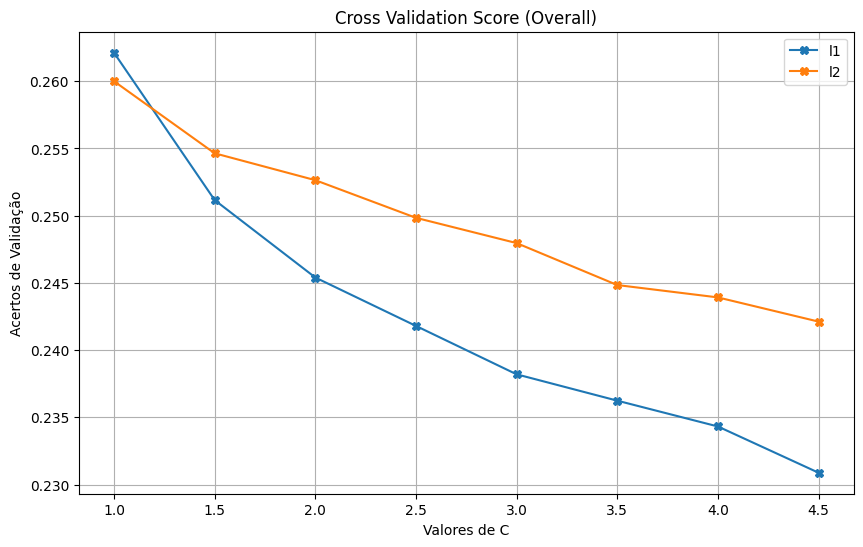

In [26]:
data = loadFile("Dados/multi/svm/parametrosLinearSVC_multi_overall")
crossValidationScore(data,"(Overall)")

Para os melhores parâmetros para o overall de multi-classe, verifica-se que apesar de term acertos de validação bastante baixos, comparativamente aos resultados apresentados na classificação binária com o melhor valor igual a 26.21% pertencente à $\textbf{penalização L1 com o valor C = 1}$

Melhor C da Penalização L1:  1.0 | Pior C da Penalização L1:  4.5
Melhor C de Penalização L2:  1.0 | Pior C de Penalização L2:  4.5 

Acerto de Validação do Melhor C da Penalização L1: 0.4102
Acerto de Validação do Melhor C da Penalização L2: 0.40476 



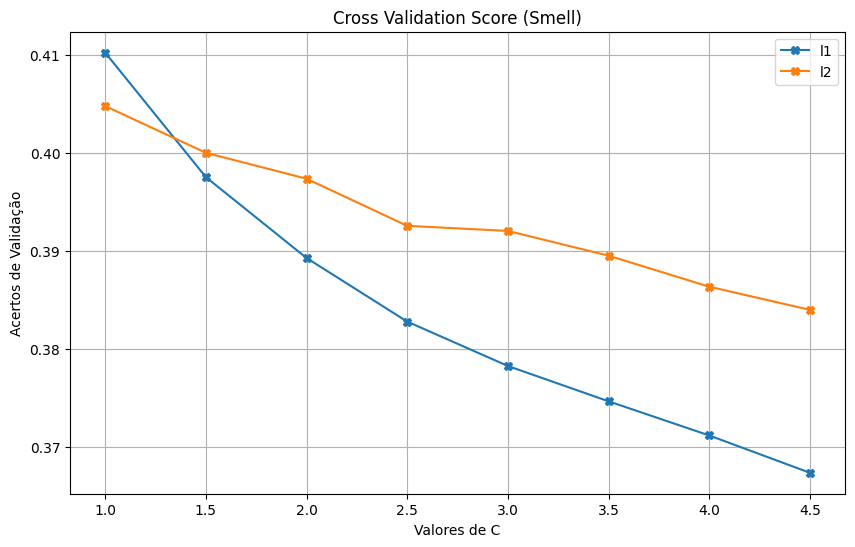

In [27]:
data = loadFile("Dados/multi/svm/parametrosLinearSVC_multi_smell")
crossValidationScore(data,"(Smell)")

No score relativo à característica smell, verificamos que já apresenta um valores de validação melhores que o overall, também sendo uma caracterísitca que apresenta 6 (0 a 5) classes ao contrário do overall que apresenta 11 (0 a 10). Temos um decréscimo por parte das duas penalizações sendo o melhor $\textbf{penalização L1}$, no ponto $\textbf{C = 1}$ com um valor de 41.02 % de acerto de validação, mais 0.53% que o melhor ponto da penalização L2.

Melhor C da Penalização L1:  1.0 | Pior C da Penalização L1:  4.5
Melhor C de Penalização L2:  1.0 | Pior C de Penalização L2:  4.5 

Acerto de Validação do Melhor C da Penalização L1: 0.43552
Acerto de Validação do Melhor C da Penalização L2: 0.43376000000000003 



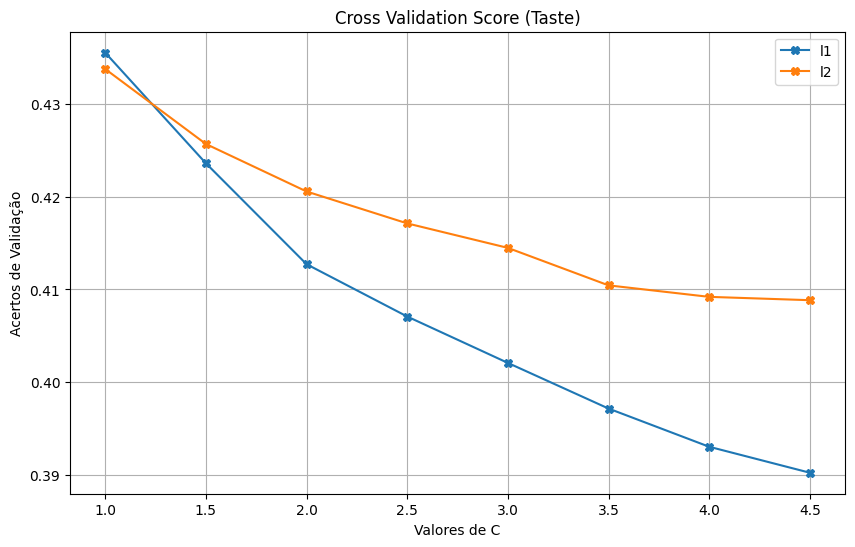

In [28]:
data = loadFile("Dados/multi/svm/parametrosLinearSVC_multi_taste")
crossValidationScore(data,"(Taste)")

Finalmente em relação ao taste, mais uma vez se demonstra uma melhor, apesar de muito ligeira, validação comparativamente com as duas anteriores onde mais uma vez o melhor valor é $\textbf{C = 1 para penalização L1}$ e uma percentagem igual a 43.55%

Treino de Classificador 

In [29]:
SVM_Classifier(X1,overall_train, 'l1', 1.0, 'multi/svm/modeloLinearSVC_train_overall')
SVM_Classifier(X1,smell_train, 'l1', 1.0, 'multi/svm/modeloLinearSVC_train_smell')
SVM_Classifier(X1,taste_train, 'l1', 1.0, 'multi/svm/modeloLinearSVC_train_taste')

svm_ts_overall = loadFile("Dados/multi/svm/modeloLinearSVC_train_overall")
svm_ts_smell = loadFile("Dados/multi/svm/modeloLinearSVC_train_smell")
svm_ts_taste = loadFile("Dados/multi/svm/modeloLinearSVC_train_taste")

Resultados

Tamanho de Vocabulário (Treino (Overall)):  15179 | Score: 50.4%
Número de Erros Teste:  37197
Matriz de Confusão: 
 [[ 828   28  149  296   45   31   15   11    0    1]
 [ 125  489  282  789   98   83   46   26    4    0]
 [  89   42 1957 2236  291  330  141   46   10    3]
 [  59   32  347 9863 1156 1472  723  193   41    6]
 [  25   26  189 3180 4703 2352 1238  368   75    5]
 [  15    9  142 2220 1366 7888 2104  682  125   14]
 [  17    5   87 1122  899 2601 6581 1053  199   27]
 [  10    6   37  490  392 1427 1881 3749  229   27]
 [   3    1   20  136  129  486  840  813 1317   30]
 [   1    0    9   43   35   99  187  298  177  428]] 

Tamanho de Vocabulário (Treino (Smell)):  15179 | Score: 59.97%
Número de Erros Teste:  30020
Matriz de Confusão: 
 [[ 4917  1240  1617   348    35]
 [ 1273  5820  5812  1185    76]
 [  680  1594 20006  4231   234]
 [  270   591  6463 12239   441]
 [   85   107  1105  2633  1998]] 

Tamanho de Vocabulário (Treino (Taste)):  15179 | Score: 61.54%
Nú

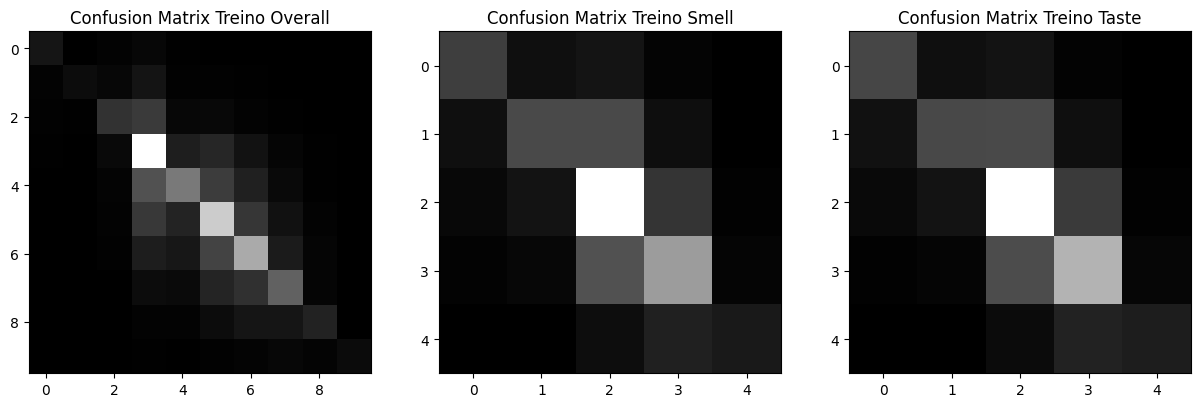

In [30]:

Results(tokens_train,svm_ts_overall,X1,overall_train,"Treino (Overall)")
Results(tokens_train,svm_ts_smell,X1,smell_train,"Treino (Smell)")
Results(tokens_train,svm_ts_taste,X1,taste_train,"Treino (Taste)")
CM_overall = confusion_matrix(overall_train, svm_ts_overall.predict(X1))
CM_smell = confusion_matrix(smell_train, svm_ts_smell.predict(X1))
CM_taste = confusion_matrix(taste_train, svm_ts_taste.predict(X1))
CM_tuple = ((CM_overall, "Treino Overall"), (CM_smell, "Treino Smell"), (CM_taste, "Treino Taste"))
drawConfusionMatrix(CM_tuple)

Tamanho de Vocabulário (Teste (Overall)):  15179 | Score: 28.52%
Número de Erros Teste:  17871
Matriz de Confusão: 
 [[ 313   80  231  401   52   44   20   10    2    1]
 [ 114   49  275  675   77   54   21    8    0    2]
 [  76   61  355 1600  240  217  100   39    7    4]
 [  54   46  346 3038  823  928  332  109   22    4]
 [  26   20  113 1386  713  986  554  151   26    2]
 [   8   10   86  862  591 1301  757  320   62   13]
 [  14    2   57  474  337  900  856  448  100   11]
 [   8    6   25  185  143  426  579  379   95   27]
 [   8    1   15   63   52  150  219  231  102   25]
 [   3    0    4   15   13   36   54   61   36   23]] 

Tamanho de Vocabulário (Teste (Smell)):  15179 | Score: 43.7%
Número de Erros Teste:  14076
Matriz de Confusão: 
 [[2424 1168 1120  168   18]
 [ 908 1577 2854  556   43]
 [ 431 1130 4657 1782  123]
 [ 129  300 2090 2093  217]
 [  50   38  319  632  173]] 

Tamanho de Vocabulário (Teste (Taste)):  15179 | Score: 45.03%
Número de Erros Teste:  13743


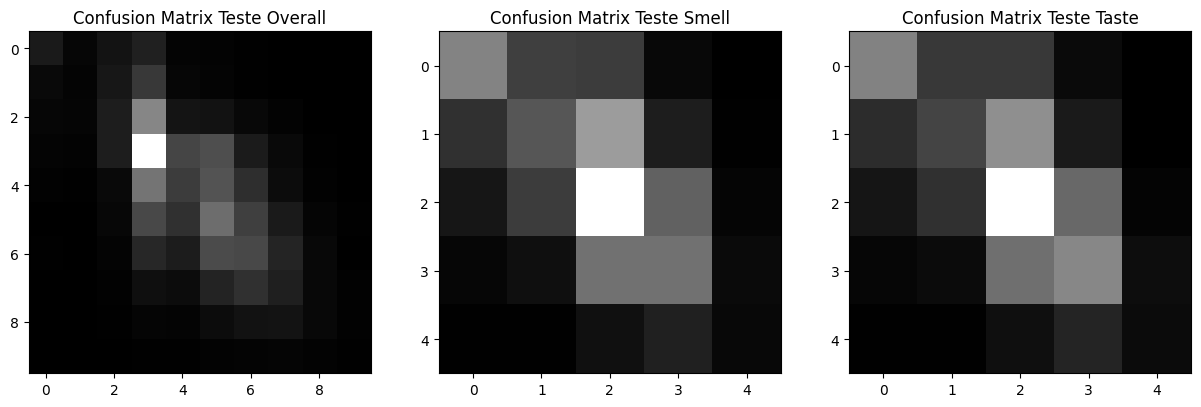

In [31]:
Results(tokens_test,svm_ts_overall,X2,overall_test,"Teste (Overall)")
Results(tokens_test,svm_ts_smell,X2,smell_test,"Teste (Smell)")
Results(tokens_test,svm_ts_taste,X2,taste_test,"Teste (Taste)")
CM_overall = confusion_matrix(overall_test, svm_ts_overall.predict(X2))
CM_smell = confusion_matrix(smell_test, svm_ts_smell.predict(X2))
CM_taste = confusion_matrix(taste_test, svm_ts_taste.predict(X2))
CM_tuple = ((CM_overall, "Teste Overall"), (CM_smell, "Teste Smell"), (CM_taste, "Teste Taste"))
drawConfusionMatrix(CM_tuple)

### 4.3.3 Classificadores Opcionais <a id=desenvolvimento-3-3></a>

Esta secção sendo uma parte opcional do trabalho é sugerido 3 tipos de classificadores adicionais para um projeto com maior desenvolvimento e conhecimento sobre a matéria lecionada na unidade curricular, por isso as opções são as seguintes: <br>
- **Regressão**: _Considere que a tarefa de estimar a pontuação da crı́tica é um problema de
regressão. Treine e avalie um modelo de regressão linear. Repita o processo
com um modelo de regressão não linear à sua escolha. Compare os resultados
da regressão com os obtidos no problema de classificação multi-classe;_

- **PCA**: _Investigue se o pré-processamento dos dados com PCA, é benéfico para o
desempenho de um classificador nas tarefas de classificação binária e multi-classe. Determine igualmente qual o número ótimo de componentes principais. Nota: use a função TruncatedSVD em vez de PCA do sub-módulo sklearn.decomposition para poder lidar com matrizes esparsas_;

- **Clustering**: _Use um ou mais algoritmos de clustering à sua escolha para agrupar crı́ticas
de uma forma não supervisionada. Analise os resultados e indique se os clusters estimados fazem sentido. Investigue o efeito da variação do número de
clusters no desempenho dos algoritmos de agrupamento_;

Foi escolhido a opção de **PCA**, por ser um mecanismo de aprendizagem não supervisionada, diferente das opções tomadas no trabalho base. PCA, consiste num método que reduz a dimensionalidade de maneira a preservar o mais possível a variação presente nos dados de alta dimensão.

#### 4.3.3.1 PCA - Classificação Binária

In [32]:
from sklearn.decomposition import TruncatedSVD

def CrossValidationScore_PCA(data,type,penalty):
    Ns = np.arange(100,1100,100)
    scores = data['scores']
    print('Melhor N da Penalização '+ penalty+': ', Ns[np.argmax(scores)], '| Pior N da Penalização '+penalty+': ', Ns[np.argmin(scores)])
    print('Acerto de Validação do Melhor N da Penalização '+ penalty+':', np.max(scores),'\n')
    plt.figure(figsize=(10,6))
    plt.plot(Ns, scores,  '-X')
    plt.title("Cross Validation Score "+type)
    plt.xlabel('Valores de N')
    plt.ylabel('Acertos de Validação')
    plt.legend(('l1', 'l2'))
    plt.grid()

def PCA_bestN_finder(X_train,overall,p,c):
    n_componentes_list = np.arange(100,1100,100)
    resultados_n = []
    for n in n_componentes_list:
        print(n)
        svd = TruncatedSVD(n_components=n).fit(X_train)
        X1 = svd.transform(X_train)
        svm = LinearSVC(dual=False, penalty=p, C=c, max_iter=5000, tol=1e-2)
        score = cross_val_score(svm, X1, overall, cv=5)
        resultados_n.append(np.mean(score))
    data = {'parametros': n_componentes_list, 'scores': resultados_n}
    return data


Melhor N da Penalização l2:  900 | Pior N da Penalização l2:  100
Acerto de Validação do Melhor N da Penalização l2: 0.93544 



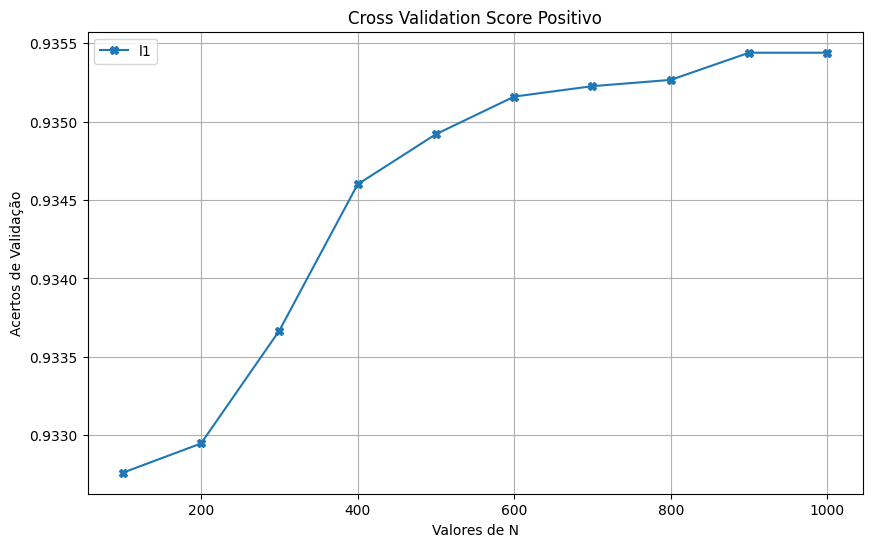

In [34]:
data = loadFile("Dados/bin/pca/parametrosPCA_pos")
CrossValidationScore_PCA(data, "Positivo",'l2')

Melhor N da Penalização l2:  1000 | Pior N da Penalização l2:  100
Acerto de Validação do Melhor N da Penalização l2: 0.95896 



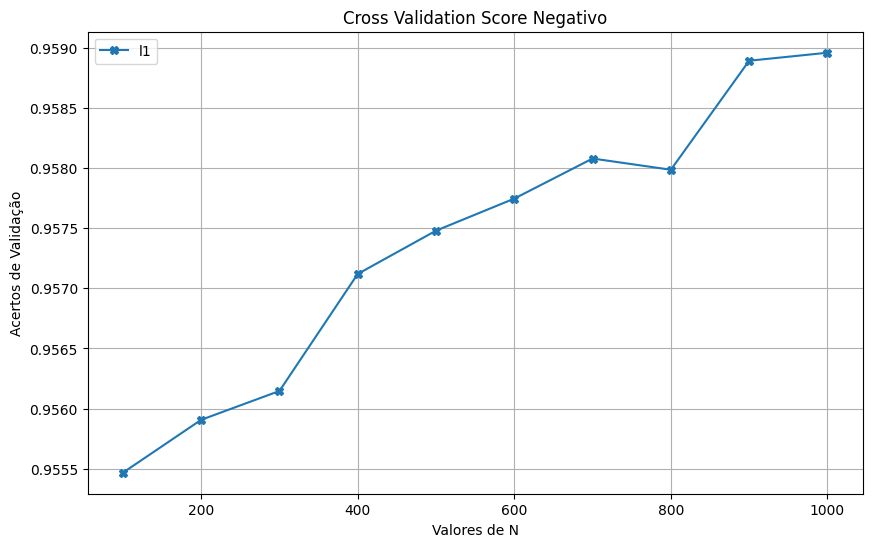

In [35]:
data = loadFile("Dados/bin/pca/parametrosPCA_neg")
CrossValidationScore_PCA(data, "Negativo",'l2')

Treino de Classificador

In [44]:
def PCA_Classifier(X_train,X_test,y_train, p, c, n, filepath):
    svd = TruncatedSVD(n_components=n).fit(X_train)
    svd1 = svd.transform(X_train)
    svd2 = svd.transform(X_test)
    svm = LinearSVC(dual=False, penalty=p, C=c, max_iter=5000, tol=1e-2).fit(svd1, y_train)
    saveFile("Dados/"+filepath, (svm,svd1,svd2))

PCA_Classifier(X1,X2,overallB_train_pos, 'l2', 1.5, 90, 'bin/pca/modeloPCA_train_pos')
PCA_Classifier(X1,X2,overallB_train_neg, 'l2', 4.5, 1000, 'bin/pca/modeloPCA_train_neg')
pca_pos_svm = loadFile("Dados/bin/pca/modeloPCA_train_pos")
pca_neg_svm = loadFile("Dados/bin/pca/modeloPCA_train_neg")

In [47]:
Results(tokens_train,pca_pos_svm[0],pca_pos_svm[1],overallB_train_pos,"Treino Positivo")
Results(tokens_train,pca_neg_svm[0],pca_neg_svm[1],overallB_train_neg,"Treino Negativo")
Results(tokens_test,pca_pos_svm[0],pca_pos_svm[2],overallB_test_pos,"Teste Positivo")
Results(tokens_test,pca_neg_svm[0],pca_neg_svm[2],overallB_test_neg,"Teste Negativo")

Tamanho de Vocabulário (Treino Positivo):  15179 | Score: 93.28%
Número de Erros Teste:  5037
Matriz de Confusão: 
 [[69942     6]
 [ 5031    21]] 

Tamanho de Vocabulário (Treino Negativo):  15179 | Score: 96.05%


Número de Erros Teste:  2960
Matriz de Confusão: 
 [[71487   167]
 [ 2793   553]] 

Tamanho de Vocabulário (Teste Positivo):  15179 | Score: 95.55%
Número de Erros Teste:  1113
Matriz de Confusão: 
 [[23887     2]
 [ 1111     0]] 

Tamanho de Vocabulário (Teste Negativo):  15179 | Score: 91.38%
Número de Erros Teste:  2156
Matriz de Confusão: 
 [[22457   114]
 [ 2042   387]] 



#### 4.3.3.2 PCA - Classificação Multi-Classe

Melhor N da Penalização l1:  600 | Pior N da Penalização l1:  100
Acerto de Validação do Melhor N da Penalização l1: 0.2964133333333333 



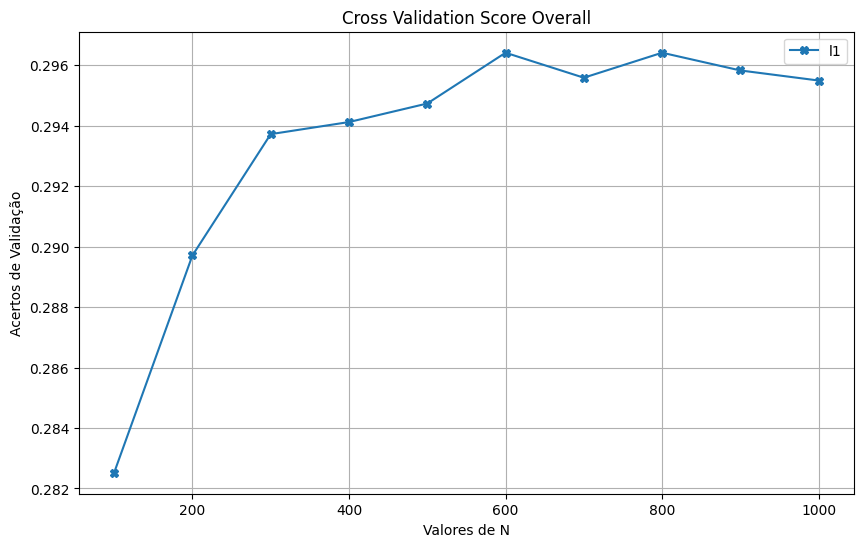

In [50]:
data = loadFile("Dados/multi/pca/parametrosPCA_multi_overall")
CrossValidationScore_PCA(data, "Overall",'l1')

Melhor N da Penalização l1:  1000 | Pior N da Penalização l1:  100
Acerto de Validação do Melhor N da Penalização l1: 0.4521866666666666 



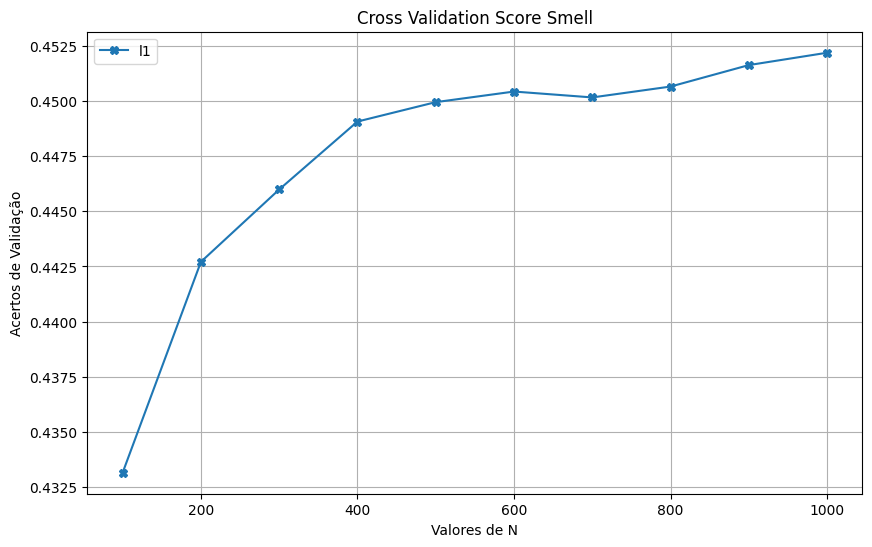

In [51]:
data = loadFile("Dados/multi/pca/parametrosPCA_multi_smell")
CrossValidationScore_PCA(data, "Smell",'l1')

Melhor N da Penalização l1:  900 | Pior N da Penalização l1:  100
Acerto de Validação do Melhor N da Penalização l1: 0.47026666666666667 



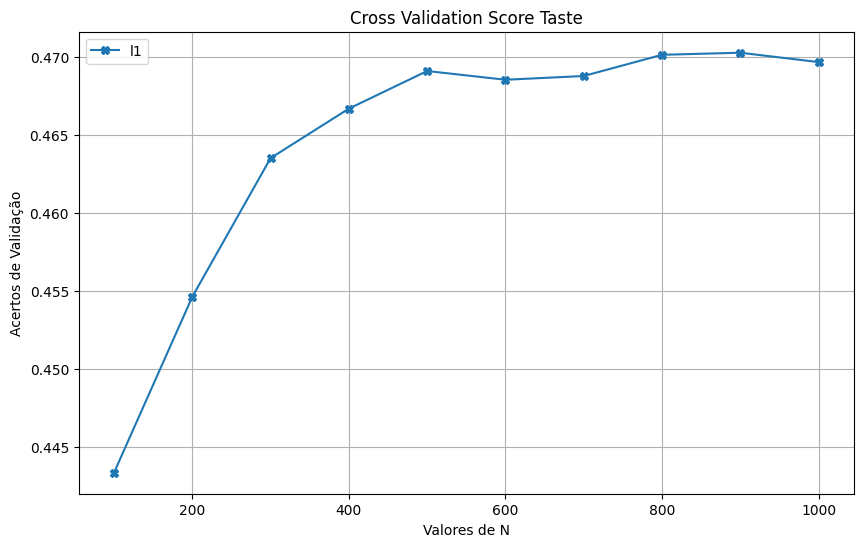

In [52]:
data = loadFile("Dados/multi/pca/parametrosPCA_multi_taste")
CrossValidationScore_PCA(data, "Taste",'l1')

In [55]:
PCA_Classifier(X1,X2,overall_train, 'l1', 1, 600, 'multi/pca/modeloPCA_train_overall')
PCA_Classifier(X1,X2,smell_train, 'l1', 1, 1000, 'multi/pca/modeloPCA_train_smell')
PCA_Classifier(X1,X2,taste_train, 'l1', 1, 900, 'multi/pca/modeloPCA_train_taste')

pca_ts_overall_svm = loadFile("Dados/multi/pca/modeloPCA_train_overall")
pca_ts_smell_svm = loadFile("Dados/multi/pca/modeloPCA_train_smell")
pca_ts_taste_svm = loadFile("Dados/multi/pca/modeloPCA_train_taste")

KeyboardInterrupt: 

In [ ]:
Results(tokens_train,pca_ts_overall_svm[0],pca_ts_overall_svm[1],overall_train,"(Overall)")
Results(tokens_train,pca_ts_smell_svm[0],pca_ts_smell_svm[1],smell_train,"(Smell)")
Results(tokens_train,pca_ts_taste_svm[0],pca_ts_taste_svm[1],taste_train,"(Taste")
CM_overall = confusion_matrix(overall_test, pca_ts_overall_svm.predict(pca_ts_overall_svm[1]))
CM_smell = confusion_matrix(smell_test, pca_ts_smell_svm.predict(pca_ts_smell_svm[1]))
CM_taste = confusion_matrix(taste_test, pca_ts_taste_svm.predict(pca_ts_taste_svm[1]))
CM_tuple = ((CM_overall, "Overall"), (CM_smell, "Smell"), (CM_taste, "Taste"))
drawConfusionMatrix(CM_tuple)

In [ ]:
Results(tokens_test,pca_ts_overall_svm[0],pca_ts_overall_svm[2],overall_test,"(Overall)")
Results(tokens_test,pca_ts_smell_svm[0],pca_ts_smell_svm[2],smell_test,"(Smell)")
Results(tokens_test,pca_ts_taste_svm[0],pca_ts_taste_svm[2],taste_test,"(Taste")
CM_overall = confusion_matrix(overall_test, pca_ts_overall_svm.predict(pca_ts_overall_svm[2]))
CM_smell = confusion_matrix(smell_test, pca_ts_smell_svm.predict(pca_ts_smell_svm[2]))
CM_taste = confusion_matrix(taste_test, pca_ts_taste_svm.predict(pca_ts_taste_svm[2]))
CM_tuple = ((CM_overall, "Overall"), (CM_smell, "Smell"), (CM_taste, "Taste"))
drawConfusionMatrix(CM_tuple)

## Conclusões